In [34]:
import math
import os
import pandas as pd
import numpy  as np
import matplotlib.pyplot        as plt
from matplotlib                 import style
from matplotlib                 import cm

pd.set_option('display.float_format', '{:.6e}'.format)
plt.rcParams.update({'font.size': 27})
plt.rcParams["font.family"] = "sans-serif"
plt.figure(facecolor='white')
fig_size = (16, 8) # Parameter used to size every graph

<Figure size 432x288 with 0 Axes>

In [35]:
# Main parameters
initial_pos = 0.003 # depends on the size of the initial domain with porosity 1
final_pos = 0 # calculated afterwards
rev_thickness = 0.02 # size of the REV used in Paraview script integration
max_position = 0.25 # limit used in Paraview script integration
timesteps = 50 # number of time folders from OpenFOAM simulations, 0 doesnt count
timestep_size = 10 # time distance between each OpenFOAM simulation folder
initial_rev = 1
SMALL = 1e-30
altura = 0.40 # height of plug domain
comprimento_z = 0.001 # length in empty direction of plug domain

volume_rev = altura * comprimento_z * rev_thickness

number_of_revs = math.floor(max_position/rev_thickness)
print(number_of_revs)

fields = ['Ca', 'Cs', 'av', 'avkccacs', 'cacs', 'kc', 'mDot', 'magu', 'porosity', 'rp'] # first field must be Ca

# rp not present in all simulation files
all_fields = ['Ca', 'Cs', 'U_Magnitude', 'av', 'avkccacs', 'cacs', 'kc', 'mDot', 'magu', 'porosity', 'time', 'rp']

12


In [36]:
#############################################
######## ATTENTION!!! #######################
#############################################

# All the snippets in this file depends HEAVILY on everythin beeing in the correct path.
# In many parts of this sript, it is possible to see the structure of how things are being named
# and where they are being stored. Be careful when changing names structures and folders.

# Main paths
foamfile_path = '/media/pedro/ADATA_SD600Q/BLOWOUT/22-janeiro/plugao-novo-teste/vazao4/foam.foam'
rev_results_path = '/media/pedro/ADATA_SD600Q/BLOWOUT/22-janeiro/plugao-novo-teste/vazao4/'

# Foamfile is where the foam.foam file is
#foamfile_path = '/media/pedro/ADATA_SD600Q/BLOWOUT/outubro/novas_sensibilidades/sensibilidade_3/foam.foam'

# REV results path is the where the folder that contains the folders of each REV, ex.: rev_results_0.02thick
#rev_results_path = '/media/pedro/ADATA_SD600Q/BLOWOUT/outubro/novas_sensibilidades/sensibilidade_3/'

# Folder structure

# Outer folder - contains the data of different REV

# Outer / REV_RESULTS folder - contains n folders named "rev" + i, 
                                    # follow the structure 'rev_results_' + str(rev_thickness) + 'thick'
    
# Outer / REV_RESULTS folder / rev i - represents the folder where the csv of each timestep will be written by Paraview script
                                    # there multiple folders ranging from 1 to n, where n is the number of revs
                                    # Also, the file concatenating every timestep available will be written there.
        

main_result_folder = 'rev_results_' + str(rev_thickness) + 'thick'
#main_result_folder.replace('0.','0')
print(main_result_folder)

dirName = rev_results_path + main_result_folder

print(dirName)

rev_results_0.02thick
/media/pedro/ADATA_SD600Q/BLOWOUT/22-janeiro/plugao-novo-teste/vazao4/rev_results_0.02thick


In [37]:
# Reading each timestep to concatenate the CSVs for each REV folder
for j in range(1, number_of_revs + 1):
    
    # Creating an empty dataFrame
    data = []
    df_revs = pd.DataFrame(data, columns=all_fields)
    
    final_pos = initial_pos + rev_thickness
    print('REV {} starting at {} cm with end at {}'.format(j, initial_pos, final_pos))
    
    # Loading results for REV J
    rev_results_path = dirName + '/rev' + str(j)   
    
    # Looking for all timesteps results for REV J
    for i in range(1, timesteps):

        # Loading data to dataframe
        csv_filename = rev_results_path + '/' + 'rev' + str(j) + '_' + str(i) + '.csv'    
        aux = pd.read_csv(csv_filename)
        
        # Droping unnecessary data
        actual_timestep_data = aux.drop(columns=['U_0','U_1','U_2'])
        
        # Adding the timestep
        actual_timestep = i * timestep_size
        actual_timestep_data['time'] = actual_timestep
        
        # Concatenating the data
        df_revs = pd.concat([df_revs, actual_timestep_data], axis=0)
        
        # Finished timestep ok
        #print('Finished timestep {} for REV {}'.format(actual_timestep, j))
  
    # Exporting consolidated data for REV j in its folder
    concatenated_csv_name = rev_results_path + '/' + 'rev' + str(j) + '_consolidated.csv' 
    
    print(df_revs.sample(3))
    
    df_revs.to_csv(concatenated_csv_name)
    
    # Finished REV J ok
    print('Finished REV {}'.format(j))

REV 1 starting at 0.003 cm with end at 0.023
            Ca           Cs  U_Magnitude           av     avkccacs  \
0 1.531636e-02 0.000000e+00 1.235316e-09 7.442768e-04 1.302018e-05   
0 1.107035e-02 0.000000e+00 1.094696e-09 1.506511e-03 3.103505e-05   
0 1.422499e-02 0.000000e+00 1.189117e-09 8.594472e-04 1.449988e-05   

          cacs           kc         mDot         magu     porosity time   rp  
0 1.531636e-02 5.400932e-09 1.470712e-07 1.868207e-09 1.360567e-06  490  NaN  
0 1.107035e-02 1.039073e-08 3.149580e-07 1.530518e-09 1.336517e-06  160  NaN  
0 1.422499e-02 6.154887e-09 1.586563e-07 1.779003e-09 1.356627e-06  420  NaN  
Finished REV 1
REV 2 starting at 0.003 cm with end at 0.023
            Ca           Cs  U_Magnitude           av     avkccacs  \
0 3.810432e-03 0.000000e+00 1.056895e-09 4.349573e-03 2.563805e-05   
0 3.335241e-03 0.000000e+00 1.055735e-09 4.150906e-03 1.671766e-05   
0 3.022311e-03 0.000000e+00 1.054743e-09 3.853002e-03 9.536927e-06   

          cacs   

In [38]:
# Accessing each concatenated file built before for each REV and decomposing in files per property
for field in fields:

    print('Starting field {}'.format(field))

    REV={} #empty dictionary
    
    REV["time"] = []
    
    for j in range(1,number_of_revs+1): #for looping 
        REV["rev{}".format(j)] = []
    
    data = []
    df_revs = pd.DataFrame(data, columns=all_fields)
    
    for j in range(initial_rev, number_of_revs + 1):

        print('Starting REV {}'.format(j))
        # Loading results for REV J
        rev_results_path = dirName + '/rev' + str(j)   

        # Exporting consolidated data for REV j in its folder
        concatenated_csv_name = rev_results_path + '/' + 'rev' + str(j) + '_consolidated.csv'
        aux = pd.read_csv(concatenated_csv_name, float_precision='high')    
        print(aux.sample(2))
        
        REV["time"] = aux['time'].tolist()
        REV["rev{}".format(j)] = (aux[field] / ( volume_rev ) ).tolist()

    df_fields = pd.DataFrame(REV)
    revs_result_field = rev_results_path + '_' + field + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
    df_fields.to_csv(revs_result_field, float_format='%.6e')
    
    print('Succesfully exported field {} \n'.format(field))


Starting field Ca
Starting REV 1
   Unnamed: 0           Ca           Cs  U_Magnitude           av  \
1           0 8.848080e-03 0.000000e+00 1.059777e-09 3.377362e-03   
6           0 1.067056e-02 0.000000e+00 1.048433e-09 2.122650e-03   

      avkccacs         cacs           kc         mDot         magu  \
1 3.584527e-04 8.848080e-03 2.272310e-08 2.757947e-06 1.090776e-09   
6 8.013174e-05 1.067056e-02 1.441381e-08 7.199710e-07 1.151712e-09   

      porosity  time  rp  
1 1.296978e-06    20 NaN  
6 1.321074e-06    70 NaN  
Starting REV 2
    Unnamed: 0           Ca           Cs  U_Magnitude           av  \
43           0 3.039532e-03 0.000000e+00 1.054612e-09 3.753813e-03   
29           0 3.085755e-03 0.000000e+00 1.055020e-09 3.972241e-03   

       avkccacs         cacs           kc         mDot         magu  \
43 8.327099e-06 3.039532e-03 2.468633e-08 6.435611e-08 1.061768e-09   
29 1.176835e-05 3.085755e-03 2.612536e-08 8.915056e-08 1.062714e-09   

       porosity  time  rp  

    Unnamed: 0           Ca           Cs  U_Magnitude           av  \
46           0 3.194663e-03 0.000000e+00 1.061637e-09 5.750574e-03   
41           0 3.204815e-03 0.000000e+00 1.062108e-09 5.791094e-03   

       avkccacs         cacs           kc         mDot         magu  \
46 4.996222e-06 3.194663e-03 3.788005e-08 4.362916e-08 1.064757e-09   
41 5.589501e-06 3.204815e-03 3.814736e-08 4.869895e-08 1.065722e-09   

       porosity  time  rp  
46 1.230538e-06   470 NaN  
41 1.229688e-06   420 NaN  
Starting REV 7
    Unnamed: 0           Ca           Cs  U_Magnitude           av  \
33           0 2.950898e-03 0.000000e+00 1.061502e-09 5.981898e-03   
15           0 3.210619e-03 0.000000e+00 1.069349e-09 6.262450e-03   

       avkccacs         cacs           kc         mDot         magu  \
33 6.995273e-06 2.950898e-03 3.940488e-08 5.841416e-08 1.065505e-09   
15 1.519993e-05 3.210619e-03 4.125745e-08 1.347345e-07 1.081459e-09   

       porosity  time  rp  
33 1.226936e-06   340 N

    Unnamed: 0           Ca           Cs  U_Magnitude           av  \
8            0 4.161911e-03 0.000000e+00 1.066316e-09 5.468722e-03   
22           0 3.263155e-03 0.000000e+00 1.057621e-09 4.930042e-03   

       avkccacs         cacs           kc         mDot         magu  \
8  4.394048e-05 4.161911e-03 3.602716e-08 3.316612e-07 1.071169e-09   
22 1.383870e-05 3.263155e-03 3.245211e-08 1.024124e-07 1.066319e-09   

       porosity  time  rp  
8  1.227508e-06    90 NaN  
22 1.236677e-06   230 NaN  
Starting REV 4
    Unnamed: 0           Ca           Cs  U_Magnitude           av  \
46           0 3.034156e-03 0.000000e+00 1.056152e-09 5.190086e-03   
32           0 3.149400e-03 0.000000e+00 1.057134e-09 5.339621e-03   

       avkccacs         cacs           kc         mDot         magu  \
46 5.831338e-06 3.034156e-03 3.417385e-08 4.660173e-08 1.059266e-09   
32 8.201665e-06 3.149400e-03 3.516028e-08 6.489172e-08 1.062251e-09   

       porosity  time  rp  
46 1.236194e-06   470 N

    Unnamed: 0           Ca           Cs  U_Magnitude           av  \
9            0 4.551484e-03 0.000000e+00 1.060047e-09 4.696036e-03   
31           0 3.058304e-03 0.000000e+00 1.054920e-09 3.935373e-03   

       avkccacs         cacs           kc         mDot         magu  \
9  4.977989e-05 4.551484e-03 3.090948e-08 3.447815e-07 1.064421e-09   
31 1.084508e-05 3.058304e-03 2.588243e-08 8.405952e-08 1.062230e-09   

       porosity  time  rp  
9  1.233977e-06   100 NaN  
31 1.246479e-06   320 NaN  
Starting REV 3
    Unnamed: 0           Ca           Cs  U_Magnitude           av  \
26           0 3.132249e-03 0.000000e+00 1.056948e-09 4.850368e-03   
4            0 3.770974e-03 0.000000e+00 1.077921e-09 5.845201e-03   

       avkccacs         cacs           kc         mDot         magu  \
26 1.138578e-05 3.132249e-03 3.192644e-08 8.537737e-08 1.063922e-09   
4  8.420964e-05 3.770974e-03 3.860356e-08 7.404019e-07 1.090145e-09   

       porosity  time  rp  
26 1.238055e-06   270 N

    Unnamed: 0           Ca           Cs  U_Magnitude           av  \
15           0 1.107035e-02 0.000000e+00 1.094696e-09 1.506511e-03   
35           0 1.330566e-02 0.000000e+00 1.156575e-09 9.698501e-04   

       avkccacs         cacs           kc         mDot         magu  \
15 3.103505e-05 1.107035e-02 1.039073e-08 3.149580e-07 1.530518e-09   
35 1.617531e-05 1.330566e-02 6.877721e-09 1.726938e-07 1.708719e-09   

       porosity  time  rp  
15 1.336517e-06   160 NaN  
35 1.352968e-06   360 NaN  
Starting REV 2
    Unnamed: 0           Ca           Cs  U_Magnitude           av  \
30           0 3.071036e-03 0.000000e+00 1.054968e-09 3.953425e-03   
17           0 3.610789e-03 0.000000e+00 1.056407e-09 4.273738e-03   

       avkccacs         cacs           kc         mDot         magu  \
30 1.122230e-05 3.071036e-03 2.600136e-08 8.654008e-08 1.062452e-09   
17 2.201285e-05 3.610789e-03 2.811363e-08 1.556893e-07 1.071621e-09   

       porosity  time  rp  
30 1.246164e-06   310 N

    Unnamed: 0           Ca           Cs  U_Magnitude           av  \
42           0 2.341437e-03 0.000000e+00 1.060319e-09 6.371897e-03   
23           0 2.159007e-03 0.000000e+00 1.065045e-09 6.540934e-03   

       avkccacs         cacs           kc         mDot         magu  \
42 4.314562e-06 2.341437e-03 4.197717e-08 3.872384e-08 1.061963e-09   
23 7.748530e-06 2.159007e-03 4.309376e-08 7.258144e-08 1.068304e-09   

       porosity  time  rp  
42 1.220753e-06   430 NaN  
23 1.217123e-06   240 NaN  
Succesfully exported field porosity 

Starting field rp
Starting REV 1
    Unnamed: 0           Ca           Cs  U_Magnitude           av  \
38           0 1.376225e-02 0.000000e+00 1.172010e-09 9.130828e-04   
2            0 9.686841e-03 0.000000e+00 1.053555e-09 2.928368e-03   

       avkccacs         cacs           kc         mDot         magu  \
38 1.530400e-05 1.376225e-02 6.506043e-09 1.650725e-07 1.743110e-09   
2  2.251765e-04 9.686841e-03 1.973058e-08 1.751606e-06 1.097939e-09

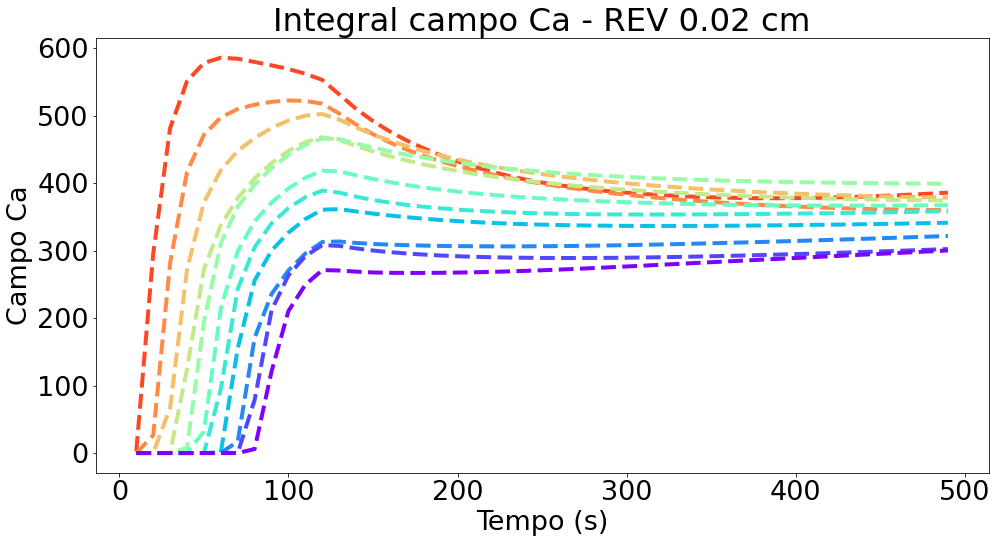

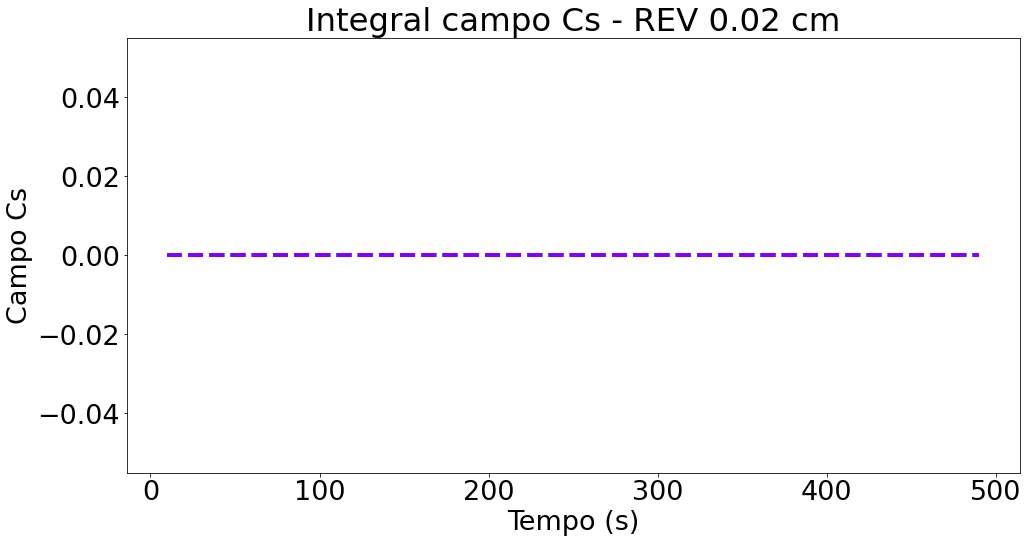

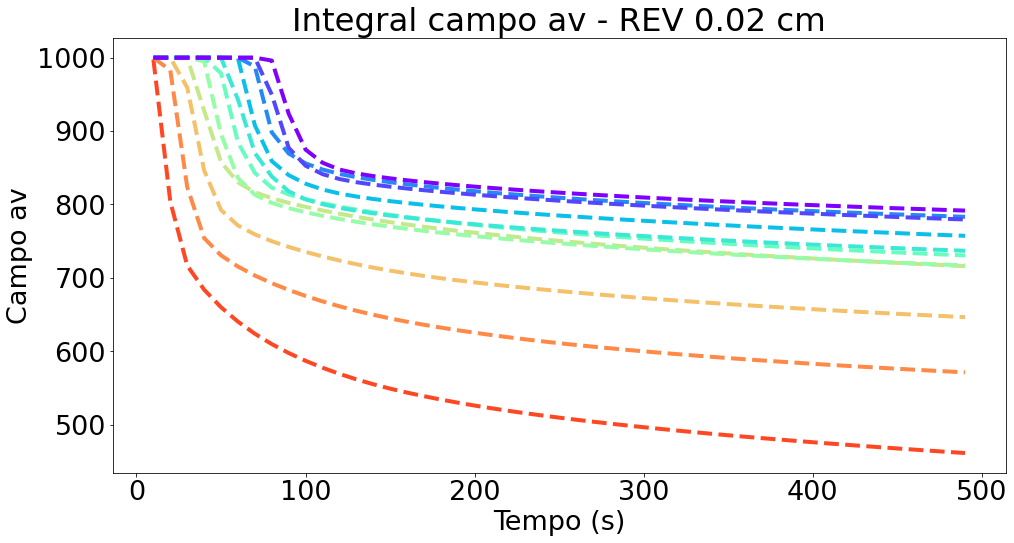

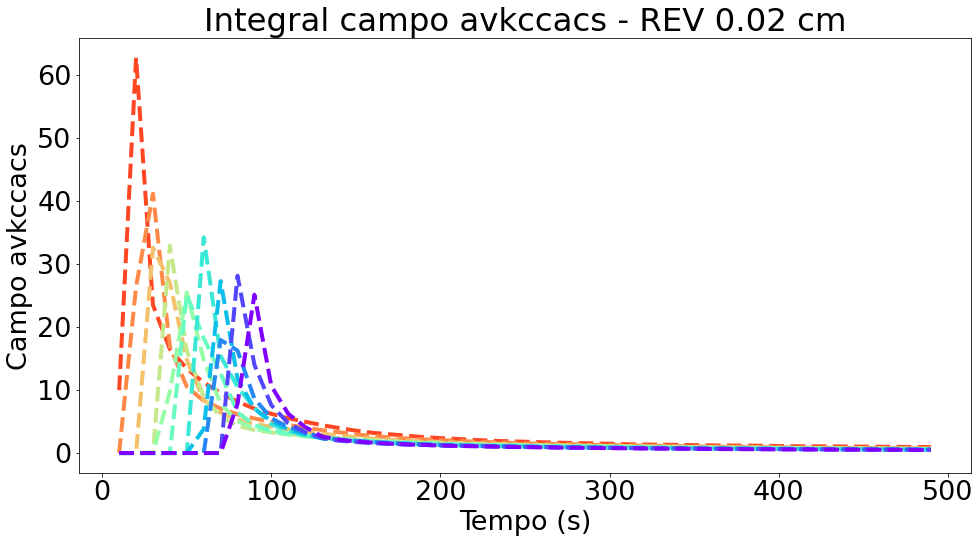

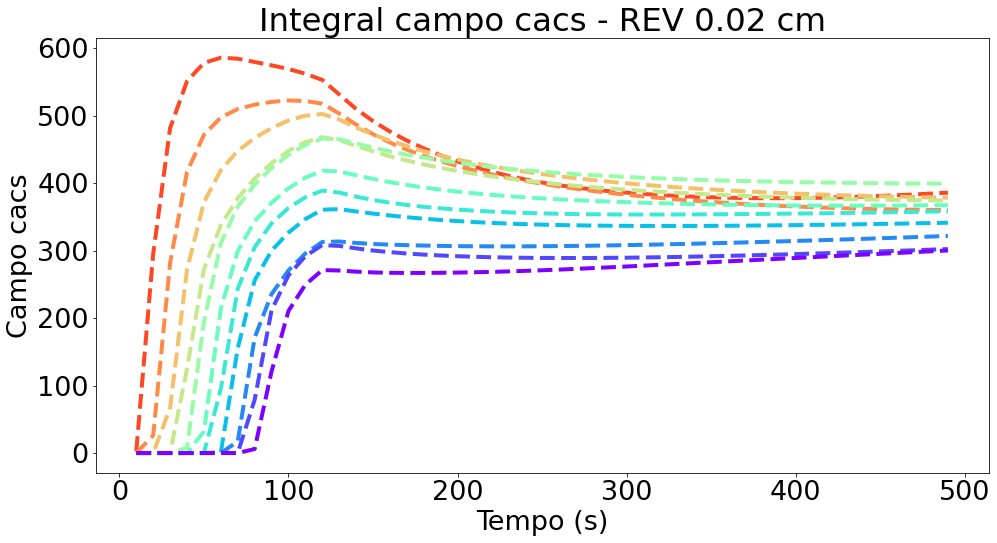

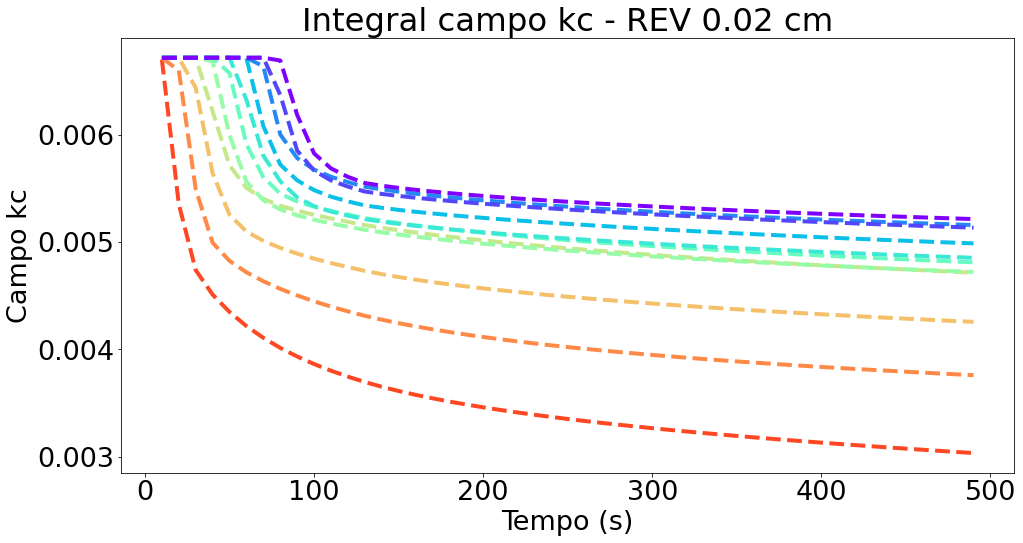

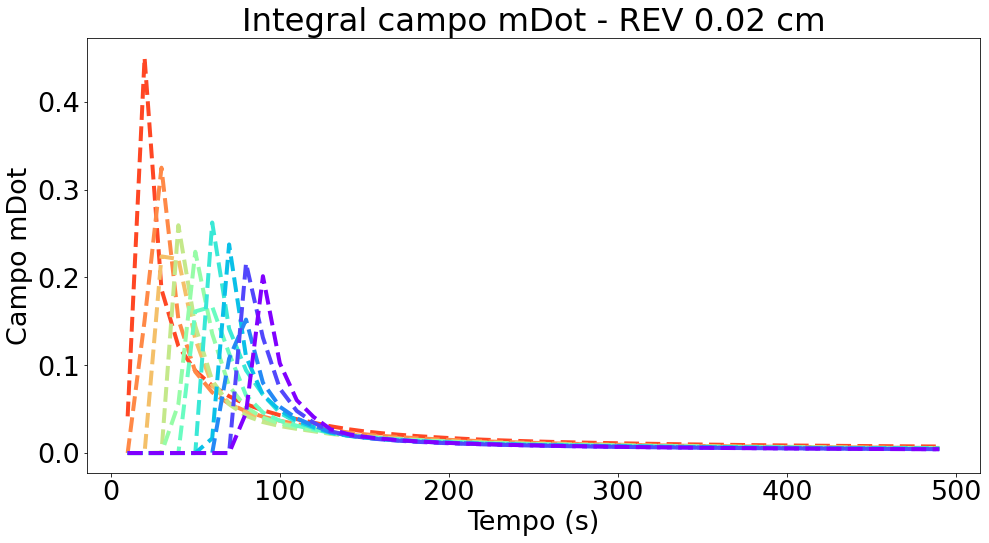

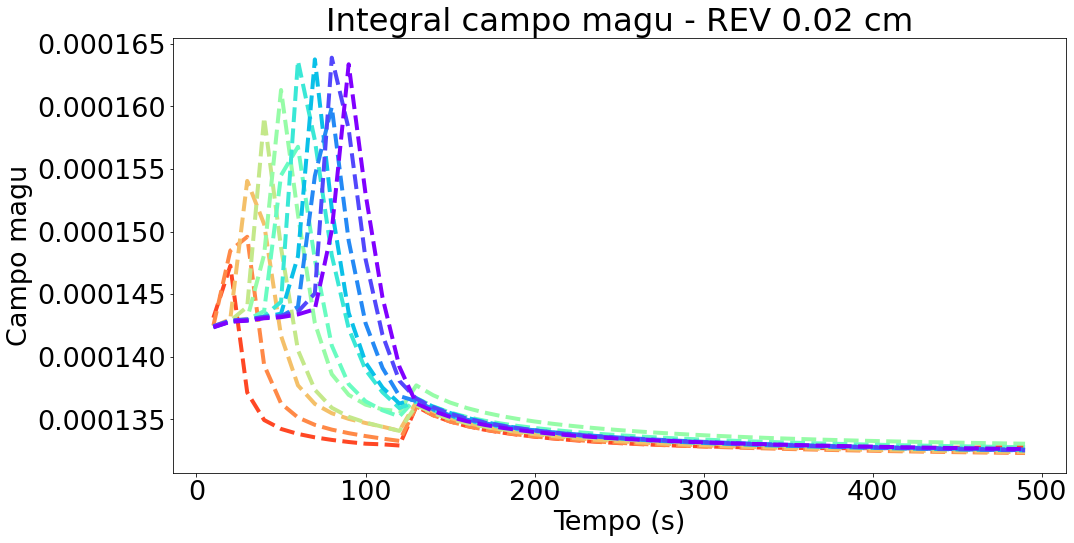

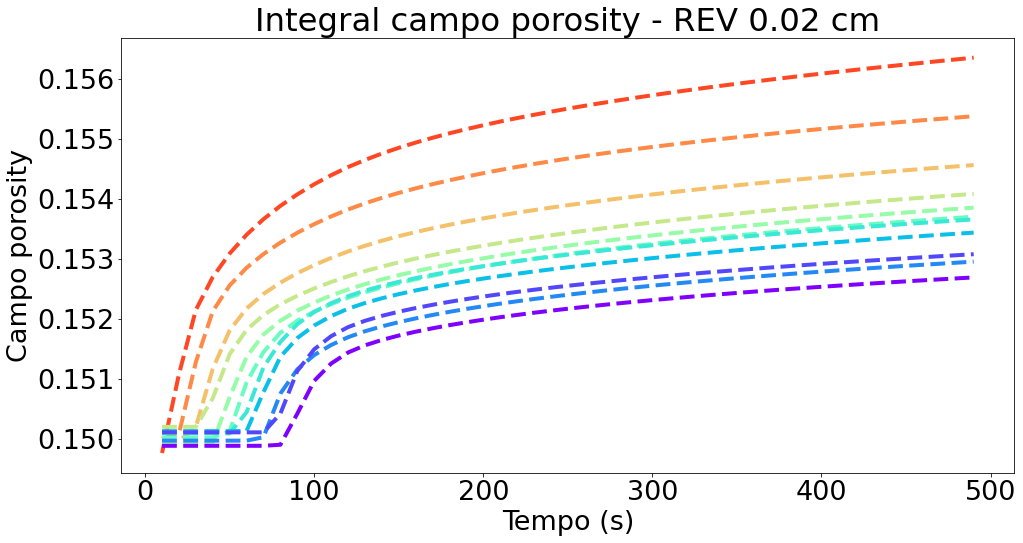

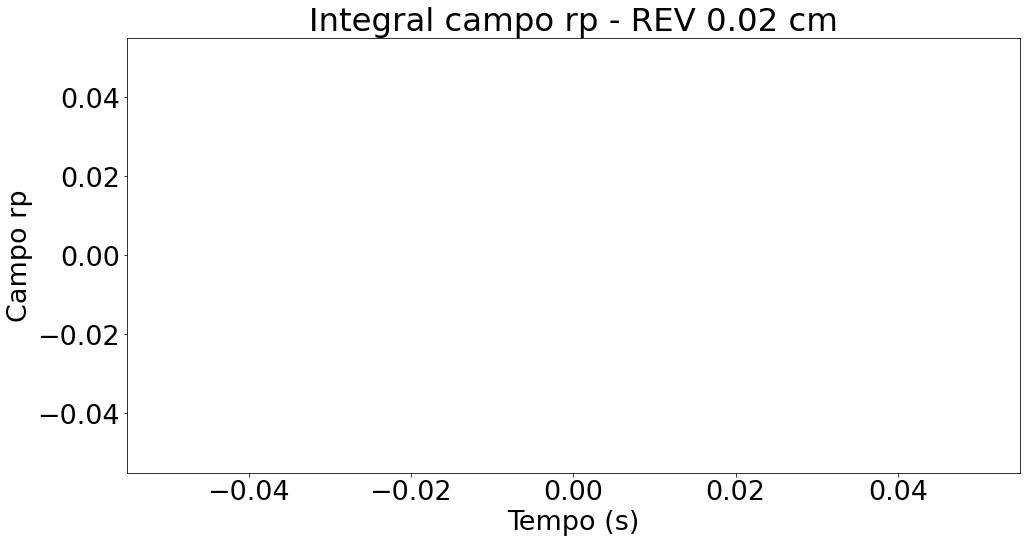

In [39]:
# Ploting graph for each field WITHOUT time uniformization

# Creating color map gradient - USED FOR ALL GRAPHS
col=cm.rainbow(np.linspace(1,0,number_of_revs))

for field in fields:

    # Create base parameters to create graph for field
    fig = plt.figure(figsize=fig_size)
    ax1 = fig.add_subplot(1,1,1)
    
    # Accessing each field file
    revs_result_field = rev_results_path + '_' + field + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
    
    # Creating dataframe from CSV
    df_fields_plot = pd.read_csv(revs_result_field, float_precision='high')
    
    # Creating time list of values
    time = df_fields_plot['time'].tolist()
    
    # Iterating for each REV
    for j in range(initial_rev, number_of_revs):
        
        # Reading the field for REV j
        rev_now = 'rev' + str(j+1)
        rev_field = df_fields_plot[rev_now].tolist()
        
        # Ploting data
        ax1.plot(time, rev_field, color=col[j], linestyle="--", linewidth=4, markersize=6, marker="", markevery=1, label=r'REV '.format(j))
        
    # Finishing plot and saving graph
    ax1.set_xlabel(r'Tempo (s)')
    ax1.set_ylabel(r'Campo {}'.format(field))
    #ax1.axvline(x=725, ymin=0.0, ymax=1, label='Breaktrough', color='black', linestyle='dotted', linewidth=3)
    plt.title('Integral campo {} - REV {} cm'.format(field, rev_thickness))
    #ax1.legend()
    figure_name = rev_results_path + '_graph_' + field + '_' + str(rev_thickness).replace('.','',1) + '_revs.png'
    plt.savefig(figure_name, dpi=fig.dpi)

{'rev1': 0, 'rev2': 0, 'rev3': 10, 'rev4': 10, 'rev5': 20, 'rev6': 30, 'rev7': 30, 'rev8': 40, 'rev9': 50, 'rev10': 60, 'rev11': 60, 'rev12': 70}


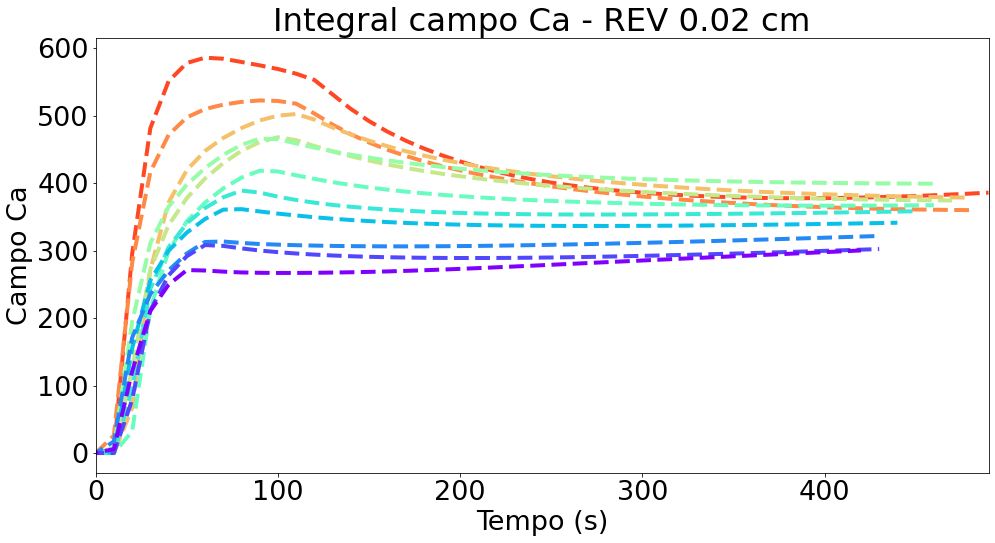

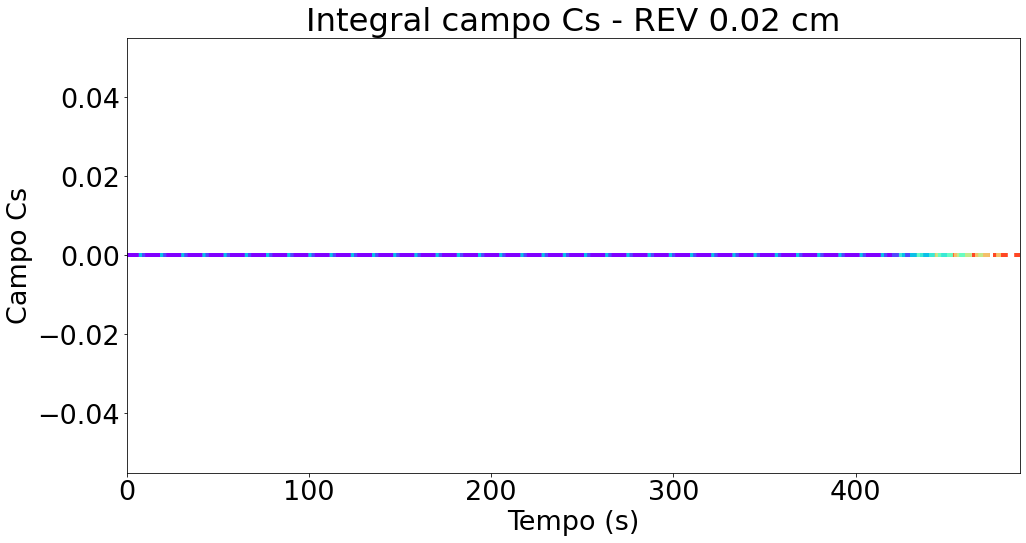

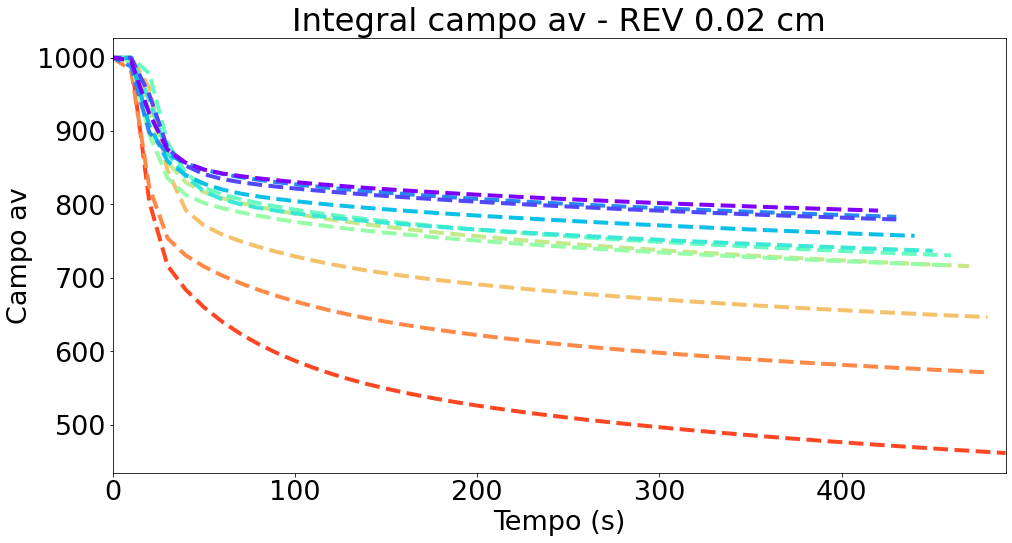

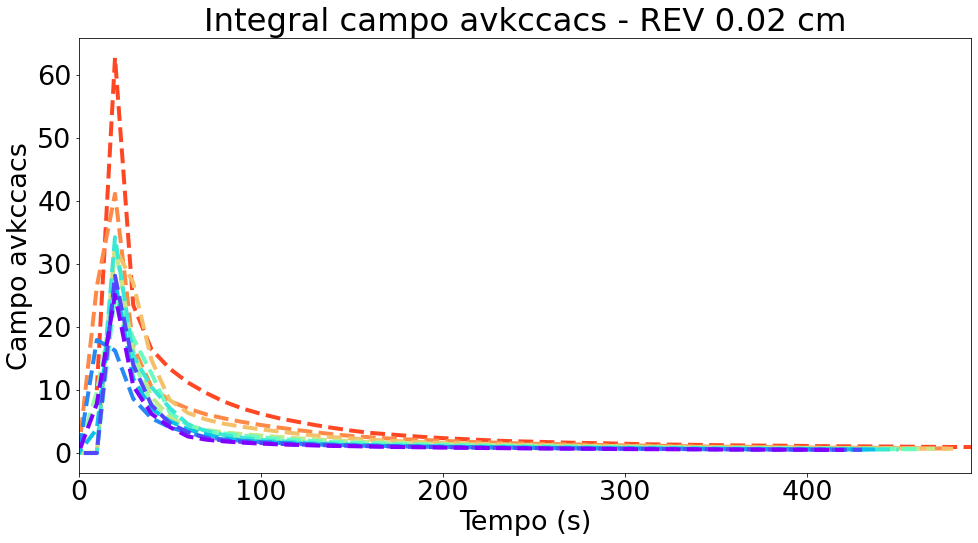

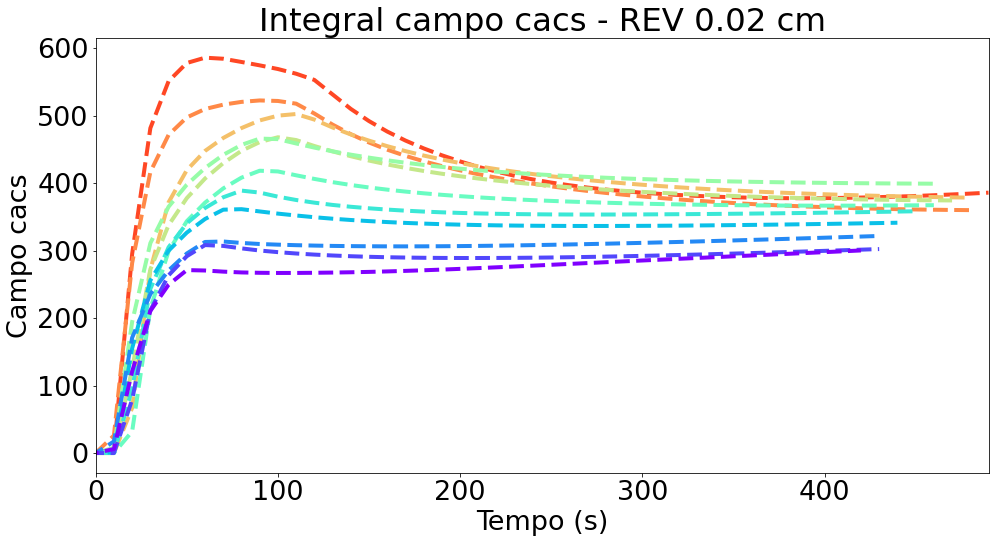

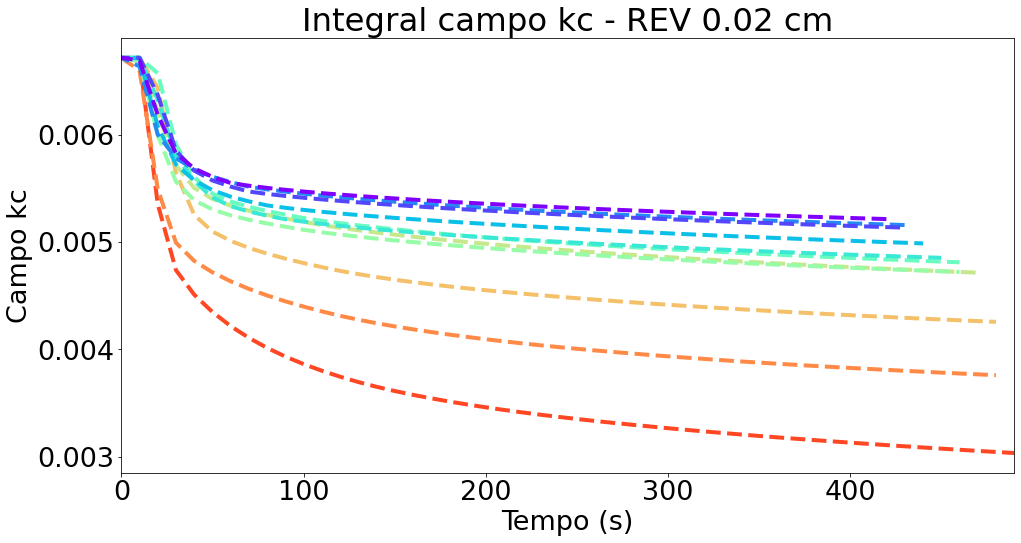

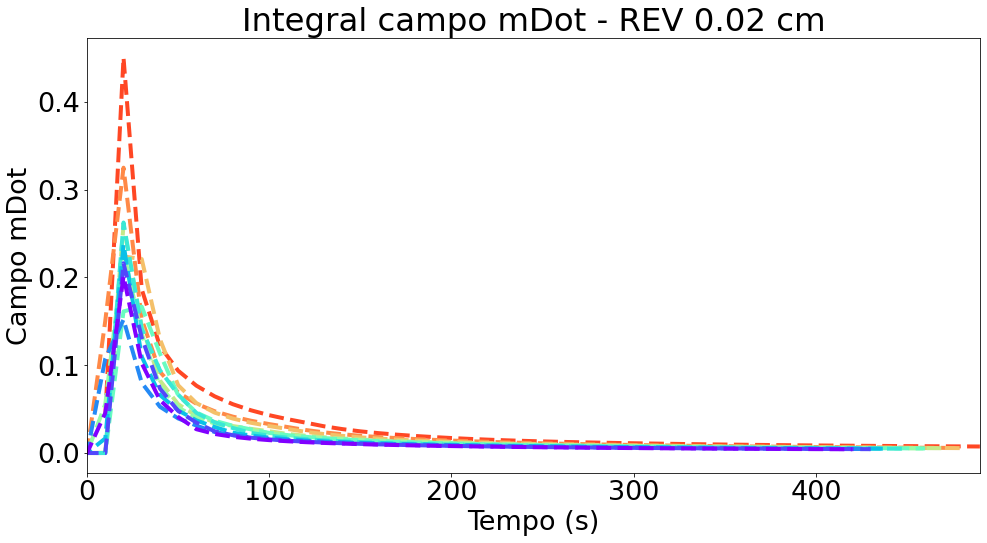

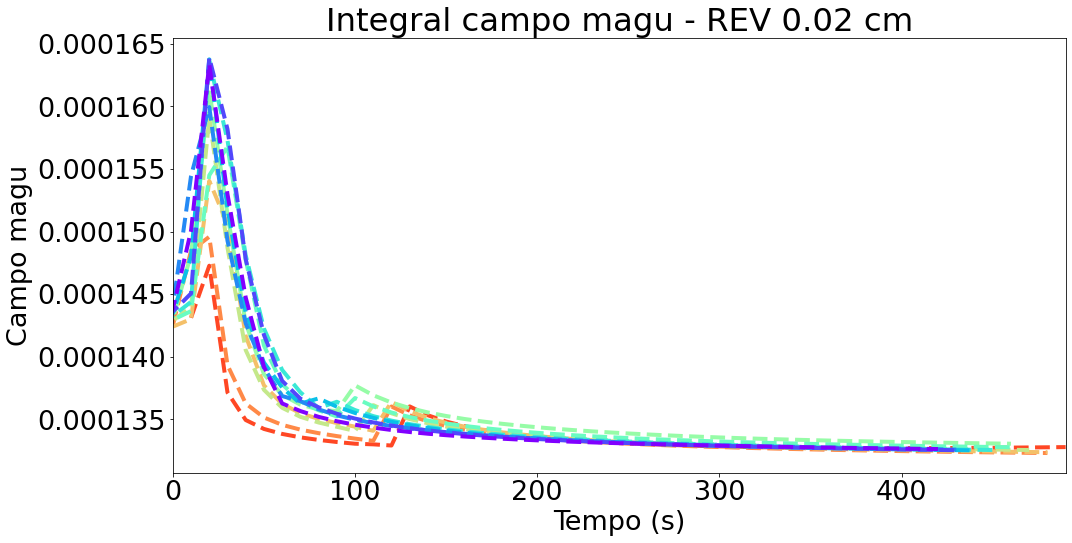

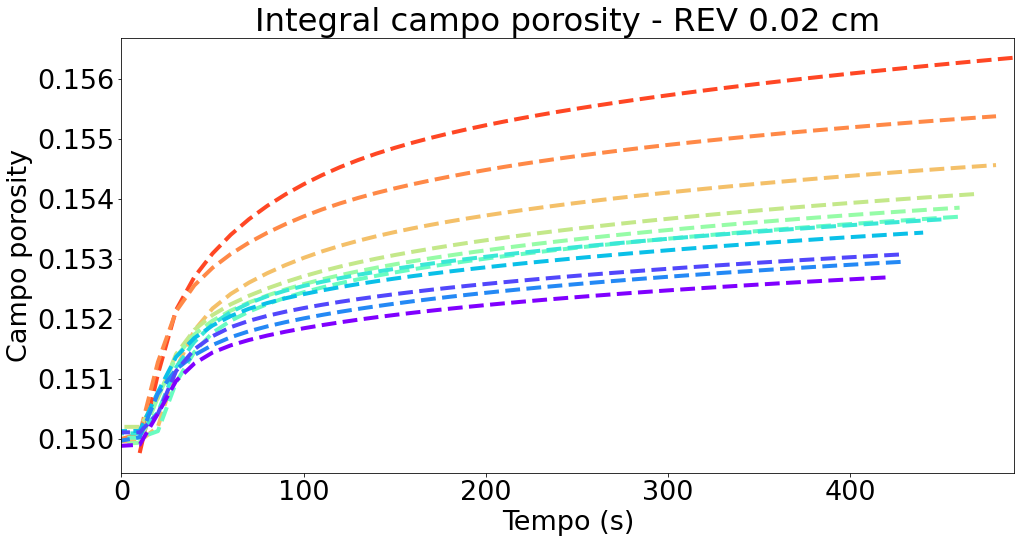

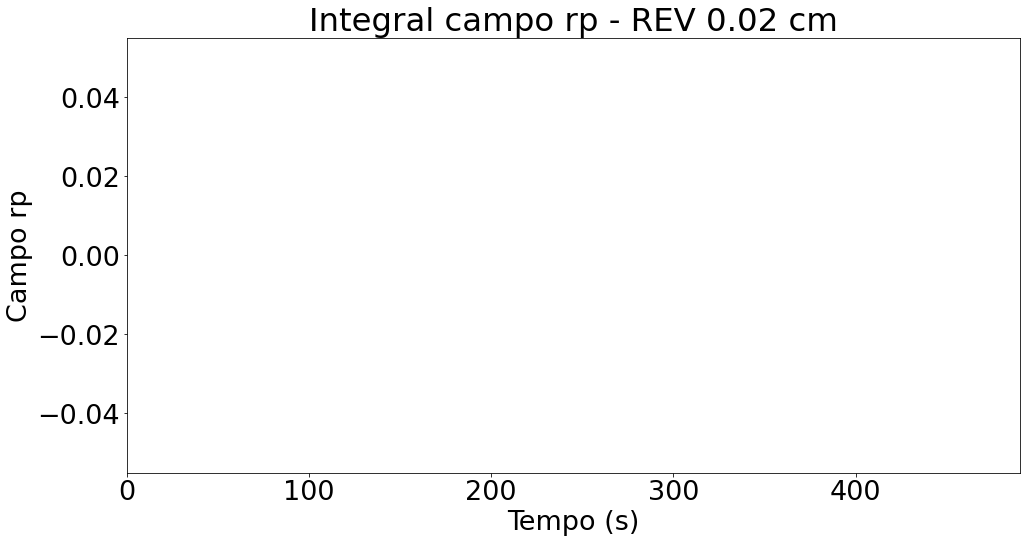

In [40]:
# Ploting graph for each field with uniform time start

# Creating color map gradient
#col=cm.rainbow(np.linspace(1,0,number_of_revs))

max_time = 0

for field in fields:

    # Create base parameters to create graph for field
    fig = plt.figure(figsize=fig_size)
    ax1 = fig.add_subplot(1,1,1)
    
    # Accessing each field file
    revs_result_field = rev_results_path + '_' + field + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
    
    # Creating dataframe from CSV
    df_fields_plot = pd.read_csv(revs_result_field, float_precision='high')
    
    # Creating time list of values
    #time = df_fields_plot['time'].tolist()
    time = df_fields_plot['time']
    
    # Finding the time where Ca enters the REV
    if field == 'Ca':
        
        start_times = {}
        
        # Looping for each REV
        for rev in df_fields_plot.columns[2:]:
            
            # Filter all times where Ca is near 0
            df_times = df_fields_plot[df_fields_plot[rev] < 1e-10]['time']
            
            if df_times.empty:
                start_time = 0
            else:
                start_time = df_times.iloc[-1]

            start_times[rev] = start_time
            
        print(start_times)
            
    # Iterating for each REV
    for j in range(initial_rev, number_of_revs):
        
        # Reading the field for REV j
        rev_now = 'rev' + str(j+1)
        #rev_field = df_fields_plot[rev_now].tolist()
        rev_field = df_fields_plot[rev_now]
        
        # Ploting data
        ax1.plot(time - start_times[rev_now], rev_field, color=col[j], linestyle="--", linewidth=4, markersize=6, marker="", markevery=1, label=r'REV '.format(j))
        
        
    # Finishing plot and saving graph
    ax1.set_xlabel(r'Tempo (s)')
    ax1.set_ylabel(r'Campo {}'.format(field))   
    
    # Searching for max time
    max_time = max( np.array( time ) )
    plt.xlim(0, max_time )    
    #ax1.axvline(x=725, ymin=0.0, ymax=1, label='Breaktrough', color='black', linestyle='dotted', linewidth=3)
    plt.title('Integral campo {} - REV {} cm'.format(field, rev_thickness))
    #ax1.legend()
    figure_name = rev_results_path + '_graph_' + field + '_' + str(rev_thickness).replace('.','',1) + '_uniform.png'
    plt.savefig(figure_name, dpi=fig.dpi)

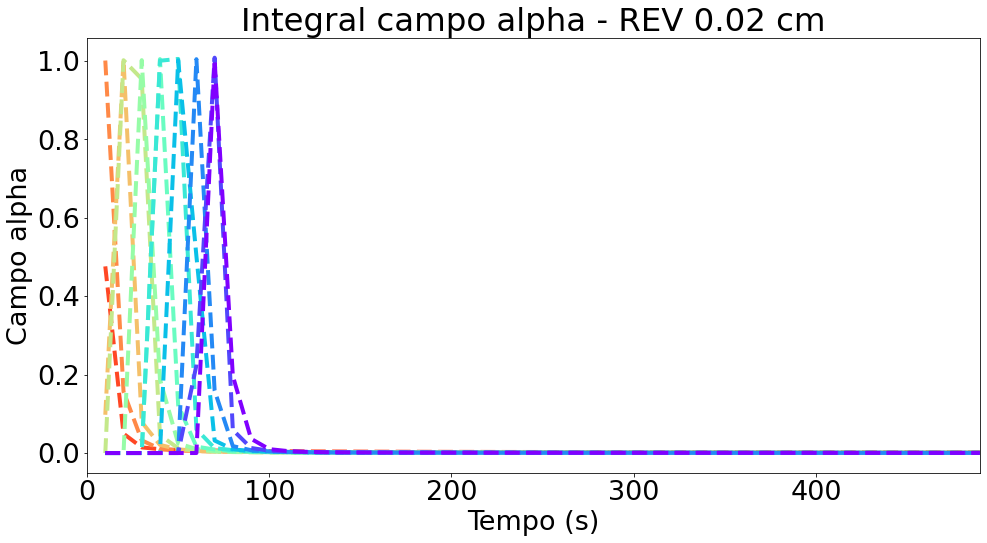

In [41]:
# Ploting graph for Solaine's alpha for each REV WITHOUT uniform start

# Creating color map gradient
col=cm.rainbow(np.linspace(1,0,number_of_revs))

# Create base parameters to create graph for field
fig = plt.figure(figsize=fig_size)
ax1 = fig.add_subplot(1,1,1)
    
# Accessing each field file
revs_result_cacs = rev_results_path + '_' + 'cacs' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
revs_result_av = rev_results_path + '_' + 'av' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
revs_result_kc = rev_results_path + '_' + 'kc' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
revs_result_avkccacs = rev_results_path + '_' + 'avkccacs' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'

# Creating dataframes from CSV
df_fields_cacs = pd.read_csv(revs_result_cacs, float_precision='high')
df_fields_av = pd.read_csv(revs_result_av, float_precision='high')
df_fields_kc = pd.read_csv(revs_result_kc, float_precision='high')
df_fields_avkccacs = pd.read_csv(revs_result_avkccacs, float_precision='high')

# Creating time list of values
#time = df_fields_plot['time'].tolist()
time = df_fields_plot['time']

ALPHA={} #empty dictionary

data = []

ALPHA["time"] = []
columns = ['time']

for j in range(1,number_of_revs+1): #for looping 
    ALPHA["rev{}".format(j)] = []
    columns.append("rev{}".format(j))

df_alpha = pd.DataFrame(data, columns=columns)

# Iterating for each REV - Plotting non-uniformely graphs
for j in range(initial_rev, number_of_revs):
    
    # Reading the field for REV j
    rev_now = 'rev' + str(j+1)
    
    # Creating arrays    
    rev_field_cacs = np.array( df_fields_cacs[rev_now].tolist() )
    rev_field_av = np.array( df_fields_av[rev_now].tolist() )
    rev_field_kc = np.array( df_fields_kc[rev_now].tolist() )
    rev_field_avkccacs = np.array( df_fields_avkccacs[rev_now].tolist() )

    # Calculating the alpha
    #alpha = (rev_field_avkccacs  * volume_rev ** 2) / (rev_field_av * rev_field_kc * rev_field_cacs + SMALL)
    alpha = (rev_field_avkccacs) / (rev_field_av * rev_field_kc * rev_field_cacs + SMALL)
    
    # Concatenating the data
    df_alpha = pd.concat([df_alpha, pd.DataFrame(alpha)], axis=0)    
    
    # Ploting data
    #ax1.plot(time - start_times[rev_now], alpha, color=col[j], linestyle="--", linewidth=2, markersize=6, marker="", markevery=1, label=r'REV '.format(j))
    ax1.plot(time, alpha, color=col[j], linestyle="--", linewidth=4, markersize=6, marker="", markevery=1, label=r'REV '.format(j))

    
# Export CSV with alphas
revs_result_field = rev_results_path + '_' + 'alpha' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
df_alpha.to_csv(revs_result_field, float_format='%.6e')

# Finishing plot and saving graph
ax1.set_xlabel(r'Tempo (s)')
ax1.set_ylabel(r'Campo {}'.format('alpha'))   

# Searching for max time
max_time = max( np.array( time ) )
plt.xlim(0, max_time )    
#ax1.axvline(x=725, ymin=0.0, ymax=1, label='Breaktrough', color='black', linestyle='dotted', linewidth=3)
plt.title('Integral campo {} - REV {} cm'.format('alpha', rev_thickness))
#ax1.legend()

#plt.semilogy()
#plt.semilogx()
figure_name = rev_results_path + '_graph_' + 'alpha' + '_' + str(rev_thickness).replace('.','',1) + '_rev.png'
plt.savefig(figure_name, dpi=fig.dpi)

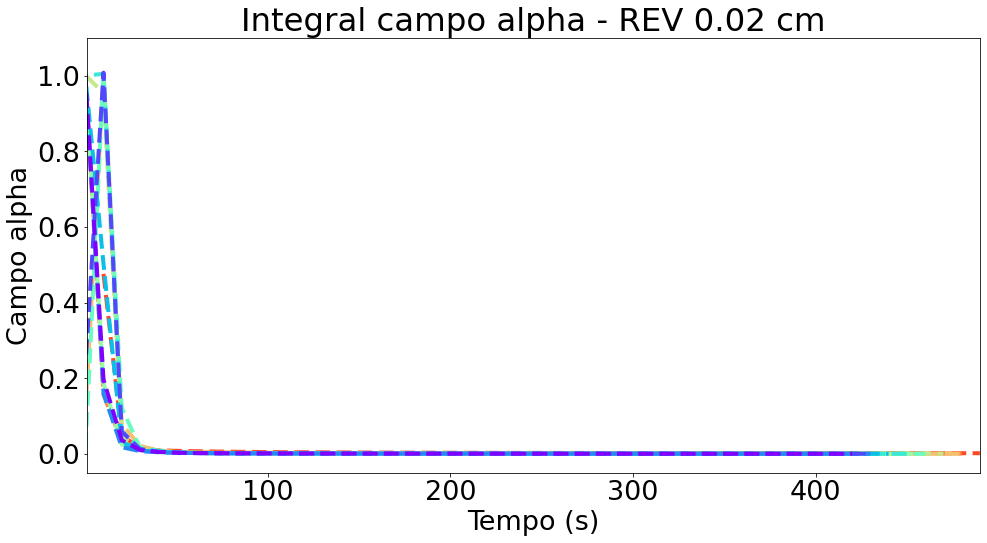

In [42]:
# Ploting graph for Solaine's alpha for each REV with uniform start

# Creating color map gradient
col=cm.rainbow(np.linspace(1,0,number_of_revs))

# Create base parameters to create graph for field
fig = plt.figure(figsize=fig_size)
ax1 = fig.add_subplot(1,1,1)
    
# Accessing each field file
revs_result_cacs = rev_results_path + '_' + 'cacs' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
revs_result_av = rev_results_path + '_' + 'av' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
revs_result_kc = rev_results_path + '_' + 'kc' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
revs_result_avkccacs = rev_results_path + '_' + 'avkccacs' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
revs_result_porosity = rev_results_path + '_' + 'porosity' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'


# Creating dataframes from CSV
df_fields_cacs = pd.read_csv(revs_result_cacs, float_precision='high')
df_fields_av = pd.read_csv(revs_result_av, float_precision='high')
df_fields_kc = pd.read_csv(revs_result_kc, float_precision='high')
df_fields_avkccacs = pd.read_csv(revs_result_avkccacs, float_precision='high')
df_fields_porosity = pd.read_csv(revs_result_porosity, float_precision='high')

# Creating time list of values
#time = df_fields_plot['time'].tolist()
time = df_fields_plot['time']

ALPHA={} #empty dictionary

data = []

ALPHA["time"] = []
columns = ['time']

for j in range(1,number_of_revs+1): #for looping 
    ALPHA["rev{}".format(j)] = []
    columns.append("rev{}".format(j))

df_alpha = pd.DataFrame(data, columns=columns)
    
# Iterating for each REV
for j in range(initial_rev, number_of_revs):
    
    # Reading the field for REV j
    rev_now = 'rev' + str(j+1)
    
    # Creating arrays    
    rev_field_cacs = np.array( df_fields_cacs[rev_now].tolist() )
    rev_field_av = np.array( df_fields_av[rev_now].tolist() )
    rev_field_kc = np.array( df_fields_kc[rev_now].tolist() )
    rev_field_avkccacs = np.array( df_fields_avkccacs[rev_now].tolist() )
    rev_field_porosity = np.array(df_fields_porosity[rev_now].tolist())

    # Calculating the alpha
    #alpha = (rev_field_avkccacs  * volume_rev ** 2) / (rev_field_av * rev_field_kc * rev_field_cacs + SMALL)
    alpha = (rev_field_avkccacs) / (rev_field_av * rev_field_kc * rev_field_cacs + SMALL)
    #test_field = 1e-6 * ( (rev_field_porosity / rev_field_porosity[0])*( (1 - rev_field_porosity[0])) / (1 - rev_field_porosity)  ) ** (- 10)
    
    #test_field /= (alpha + SMALL)
    
    # Concatenating the data
    df_alpha = pd.concat([df_alpha, pd.DataFrame(alpha)], axis=0)    
    
    # Ploting data
    ax1.plot(time - start_times[rev_now], alpha, color=col[j], linestyle="--", linewidth=4, markersize=6, marker="", markevery=1, label=r'REV '.format(j))
    #ax1.plot(time - start_times[rev_now], test_field, color=col[j], linestyle="--", linewidth=2, markersize=6, marker="", markevery=1, label=r'REV '.format(j))

    
# Export CSV with alphas
revs_result_field = rev_results_path + '_' + 'alpha' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
df_alpha.to_csv(revs_result_field, float_format='%.6e')

# Finishing plot and saving graph
ax1.set_xlabel(r'Tempo (s)')
ax1.set_ylabel(r'Campo {}'.format('alpha'))   

# Searching for max time
max_time = max( np.array( time ) )
plt.xlim(1, max_time ) 
plt.ylim(-0.05, 1.1)
#ax1.axvline(x=725, ymin=0.0, ymax=1, label='Breaktrough', color='black', linestyle='dotted', linewidth=3)
plt.title('Integral campo {} - REV {} cm'.format('alpha', rev_thickness))
#ax1.legend()

#plt.semilogy()
#plt.semilogx()
#plt.ylim(1e-3, 1.5)
figure_name = rev_results_path + '_graph_' + 'alpha' + '_' + str(rev_thickness).replace('.','',1) + '_uniform.png'
plt.savefig(figure_name, dpi=fig.dpi)

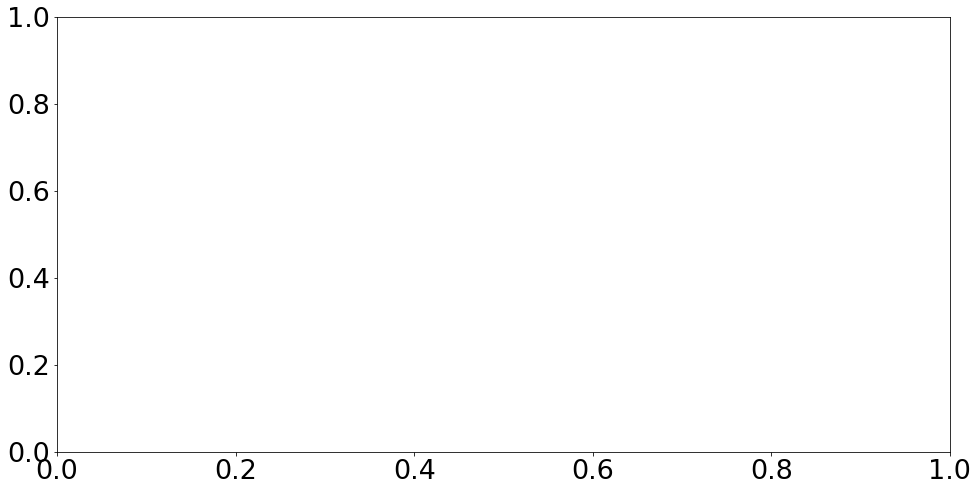

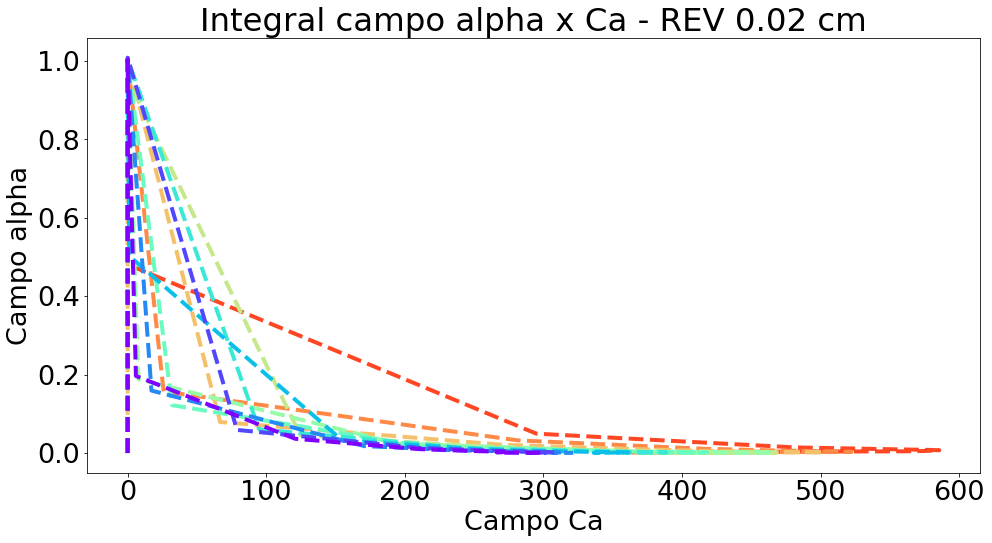

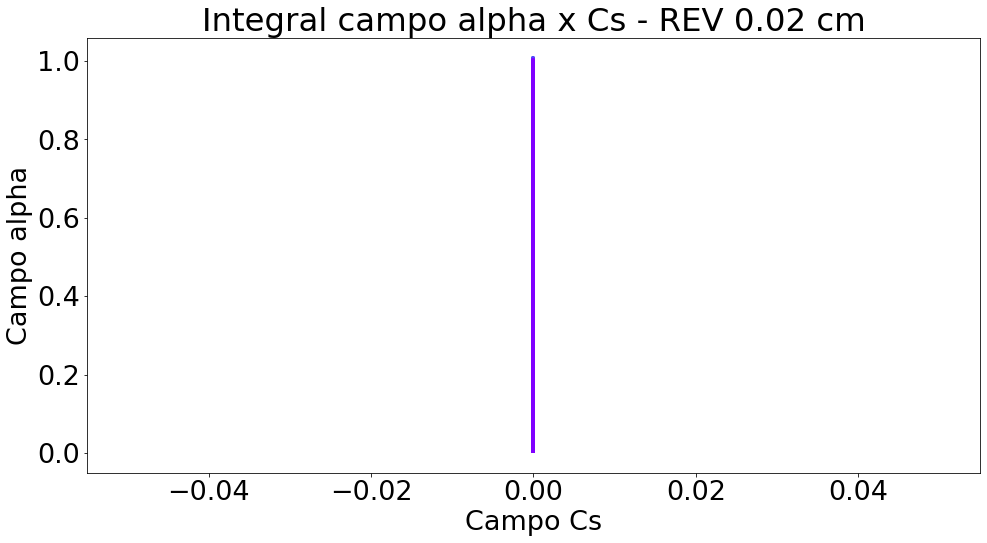

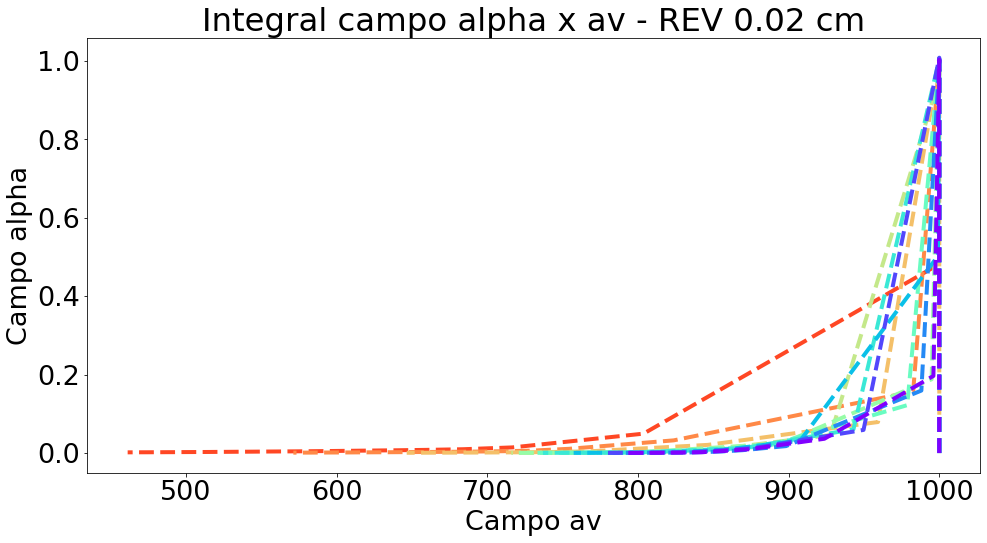

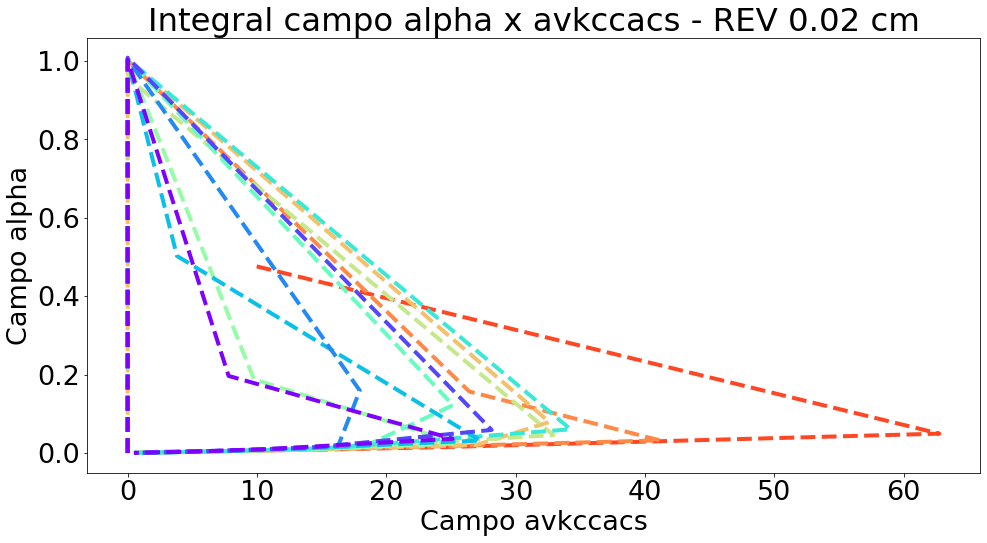

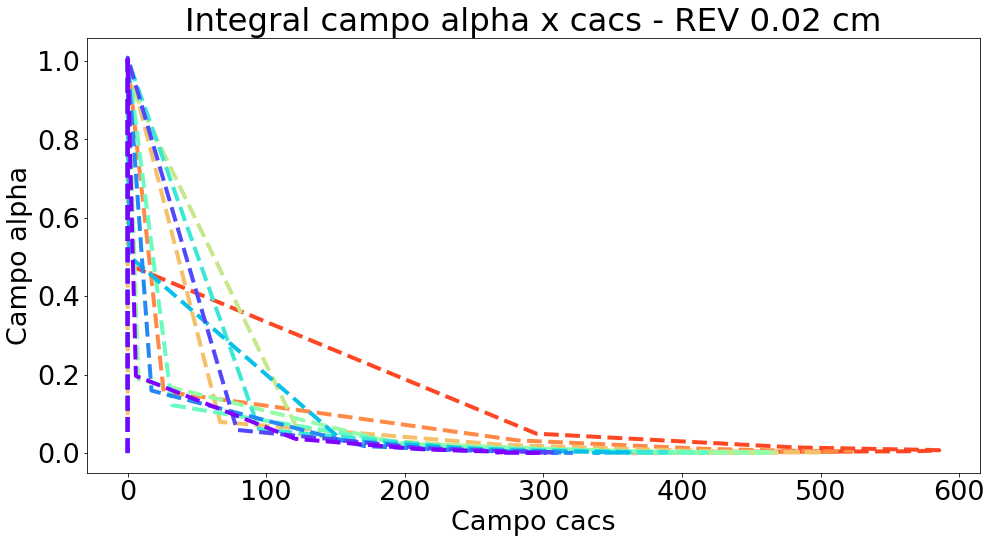

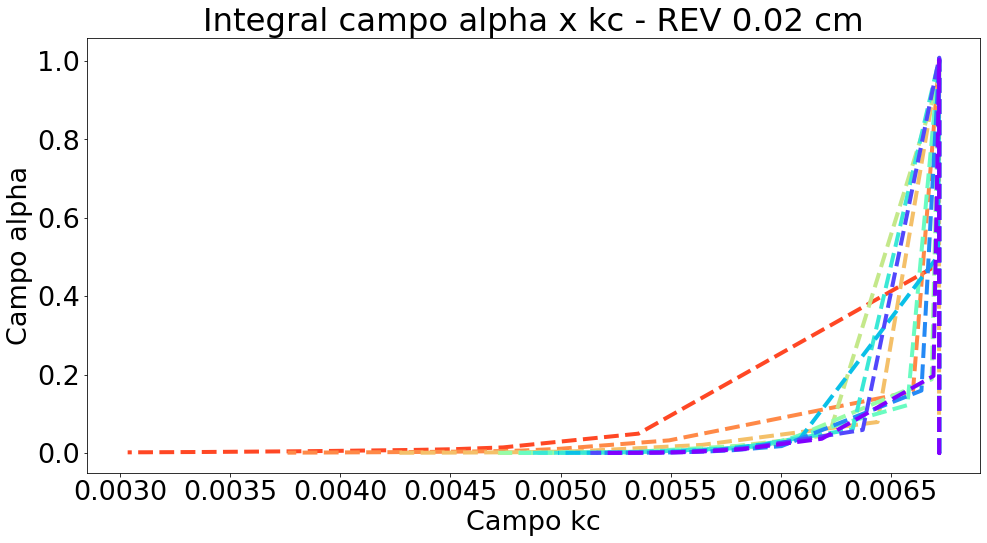

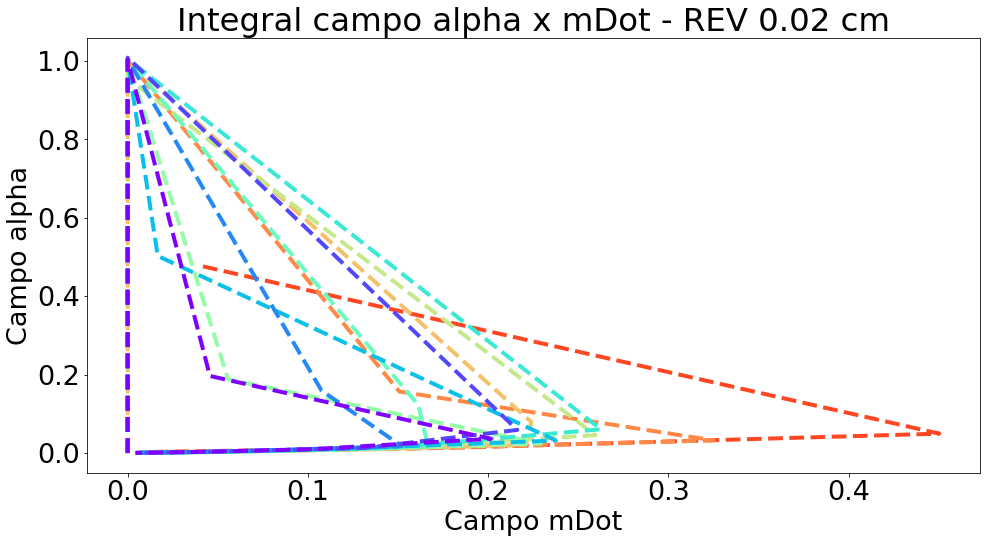

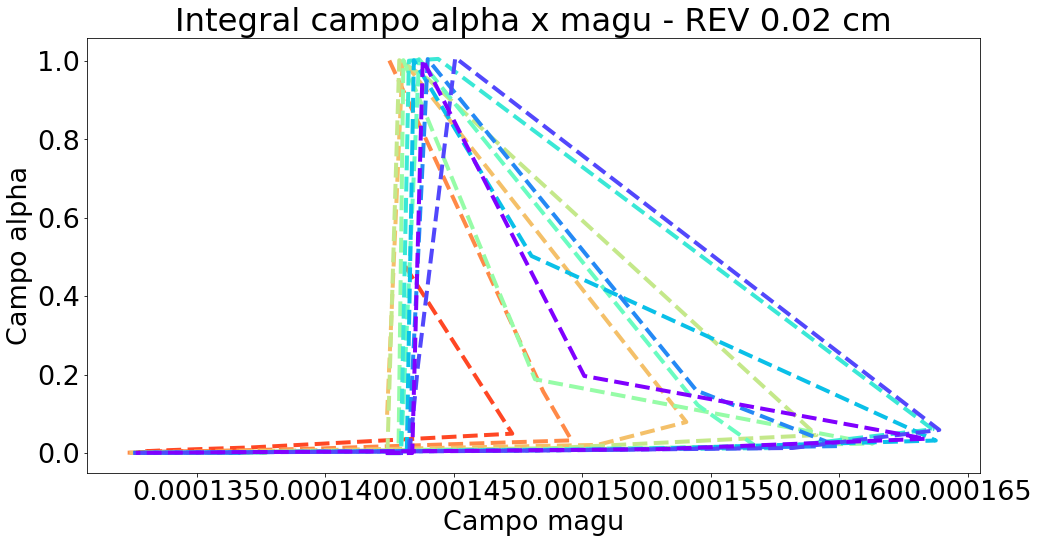

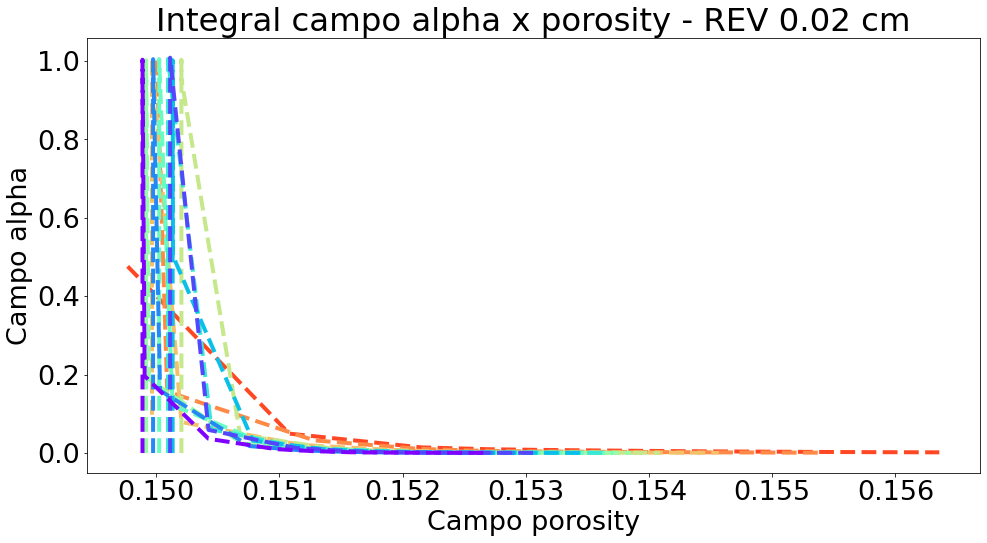

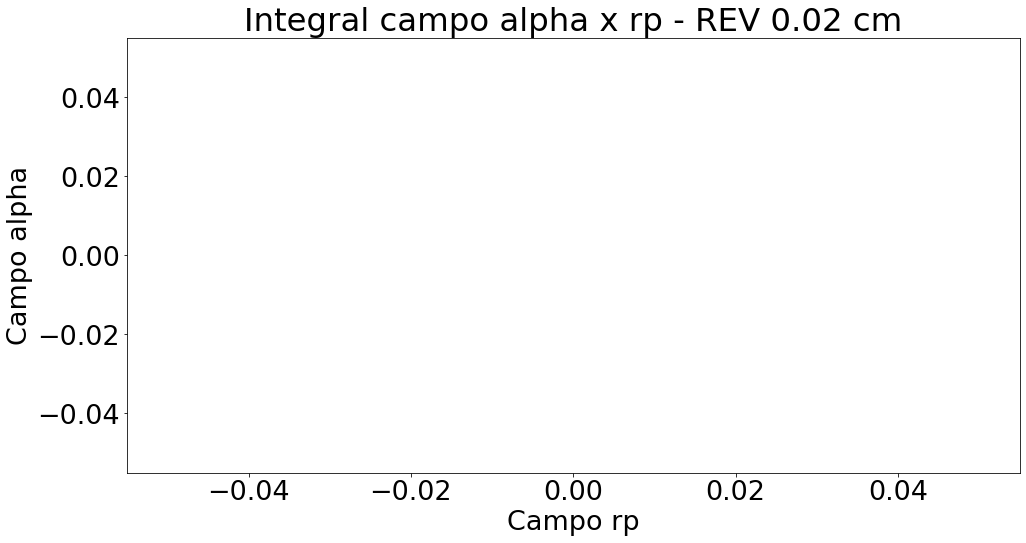

In [43]:
# Ploting graph for Solaine's alpha for each REV WITHOUT uniform start

# Creating color map gradient
col=cm.rainbow(np.linspace(1,0,number_of_revs))

# Create base parameters to create graph for field
fig = plt.figure(figsize=fig_size)
ax1 = fig.add_subplot(1,1,1)
    
# Accessing each field file
revs_result_cacs = rev_results_path + '_' + 'cacs' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
revs_result_av = rev_results_path + '_' + 'av' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
revs_result_kc = rev_results_path + '_' + 'kc' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
revs_result_avkccacs = rev_results_path + '_' + 'avkccacs' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'

# Creating dataframes from CSV
df_fields_cacs = pd.read_csv(revs_result_cacs, float_precision='high')
df_fields_av = pd.read_csv(revs_result_av, float_precision='high')
df_fields_kc = pd.read_csv(revs_result_kc, float_precision='high')
df_fields_avkccacs = pd.read_csv(revs_result_avkccacs, float_precision='high')

# Creating time list of values
#time = df_fields_plot['time'].tolist()

time = df_fields_plot['time']

for field in fields:

    # Create base parameters to create graph for field
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(1,1,1)
    
    # Accessing each field file
    revs_result_field = rev_results_path + '_' + field + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
    
    # Creating dataframe from CSV
    df_fields_plot = pd.read_csv(revs_result_field, float_precision='high')

    ALPHA={} #empty dictionary

    data = [] #empty list

    ALPHA["time"] = []
    columns = ['time']

    for j in range(2,number_of_revs+1): #for looping 
        ALPHA["rev{}".format(j)] = []
        columns.append("rev{}".format(j))

    df_alpha = pd.DataFrame(data, columns=columns)

    # Iterating for each REV - Plotting non-uniformely graphs
    for j in range(initial_rev, number_of_revs):

        # Reading the field for REV j
        rev_now = 'rev' + str(j+1)

        # Creating arrays    
        rev_field_cacs = np.array( df_fields_cacs[rev_now].tolist() )
        rev_field_av = np.array( df_fields_av[rev_now].tolist() )
        rev_field_kc = np.array( df_fields_kc[rev_now].tolist() )
        rev_field_avkccacs = np.array( df_fields_avkccacs[rev_now].tolist() )

        # Calculating the alpha
        #alpha = (rev_field_avkccacs  * volume_rev ** 2) / (rev_field_av * rev_field_kc * rev_field_cacs + SMALL)
        alpha = (rev_field_avkccacs) / (rev_field_av * rev_field_kc * rev_field_cacs + SMALL)

        # Concatenating the data
        df_alpha = pd.concat([df_alpha, pd.DataFrame(alpha)], axis=0)    

        # Reading the field for REV j
        rev_now = 'rev' + str(j+1)
        rev_field = df_fields_plot[rev_now]
        
        
        # Ploting data
        #ax1.plot(time - start_times[rev_now], alpha, color=col[j], linestyle="--", linewidth=2, markersize=6, marker="", markevery=1, label=r'REV '.format(j))
        ax1.plot(rev_field, alpha, color=col[j], linestyle="--", linewidth=4, markersize=6, marker="", markevery=1, label=r'REV '.format(j))


    # Export CSV with alphas
    #revs_result_field = rev_results_path + '_' + 'alpha' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
    #df_alpha.to_csv(revs_result_field, float_format='%.6e')

    # Finishing plot and saving graph
    ax1.set_xlabel(r'Campo {}'.format(field))
    ax1.set_ylabel(r'Campo {}'.format('alpha'))   

    #ax1.axvline(x=725, ymin=0.0, ymax=1, label='Breaktrough', color='black', linestyle='dotted', linewidth=3)
    plt.title('Integral campo {} x {} - REV {} cm'.format('alpha', field,  rev_thickness))
    #ax1.legend()

    #plt.semilogy()
    #plt.semilogx()
    figure_name = rev_results_path + '_graph_' + 'alpha' '_' + field + '_' + str(rev_thickness).replace('.','',1) + '_rev.png'
    plt.savefig(figure_name, dpi=fig.dpi)

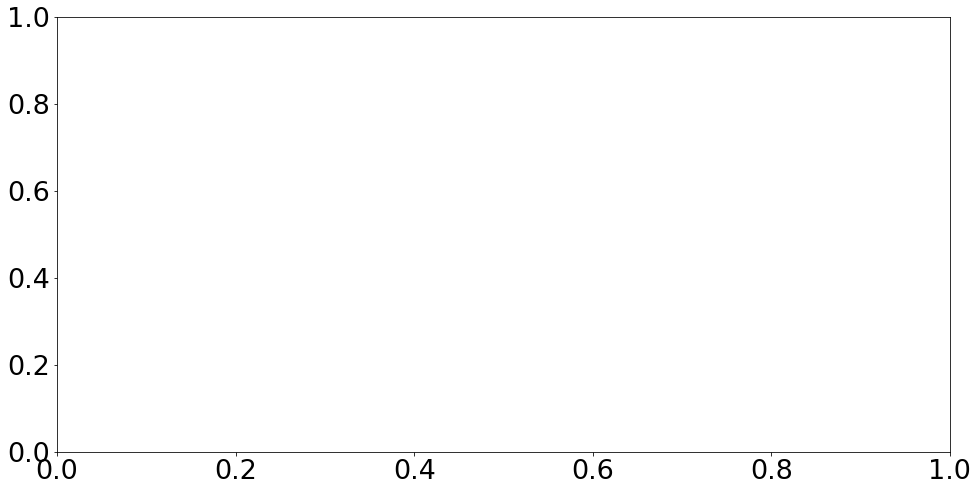

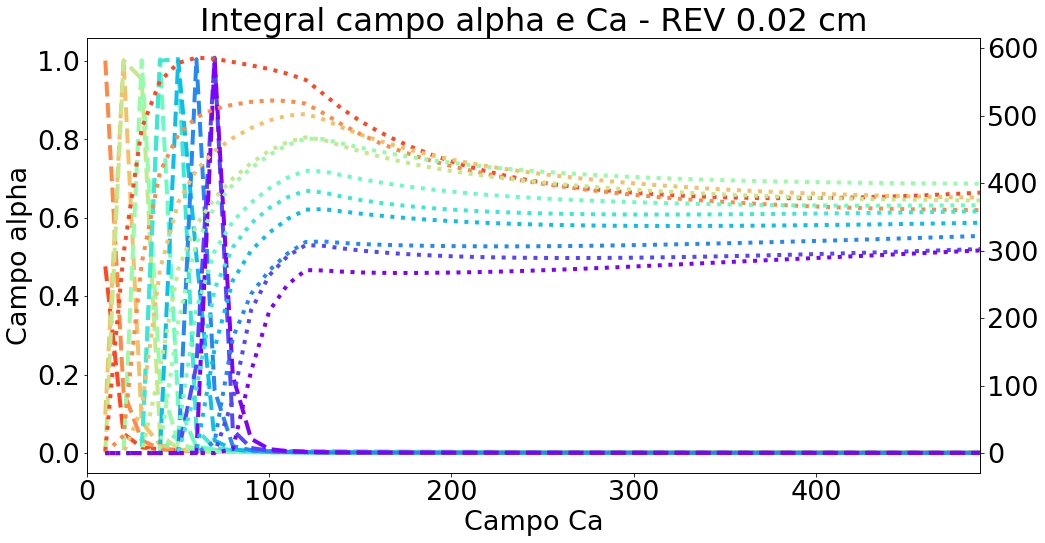

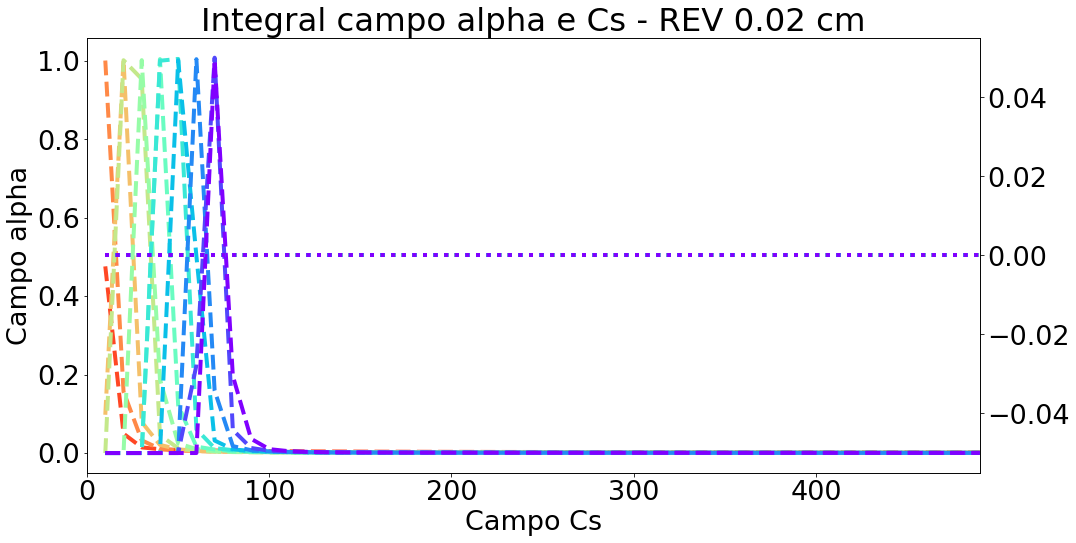

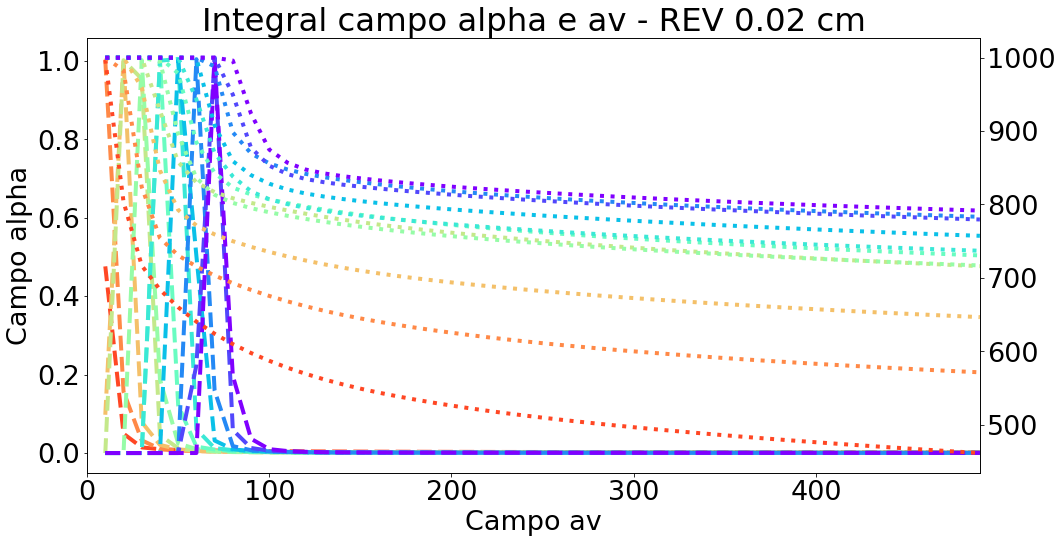

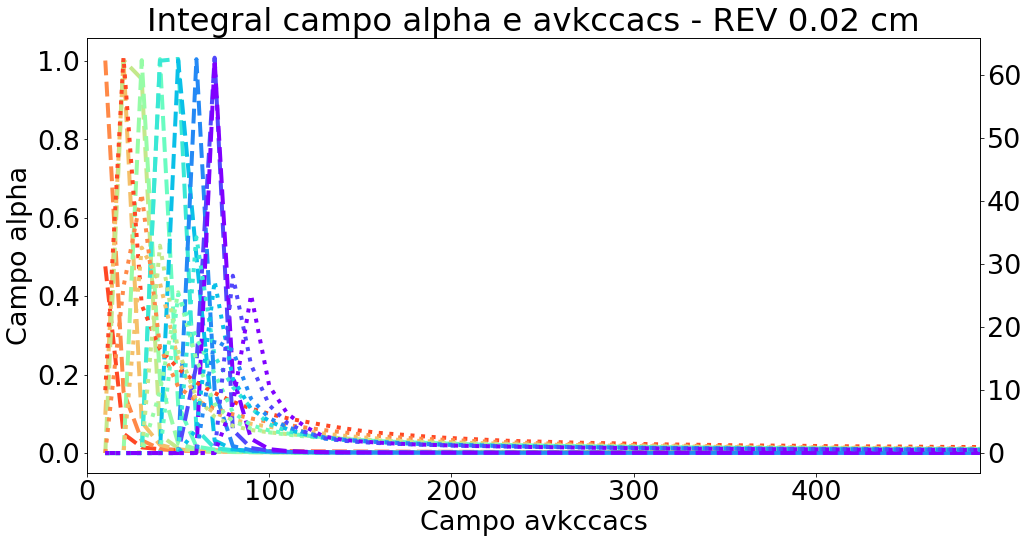

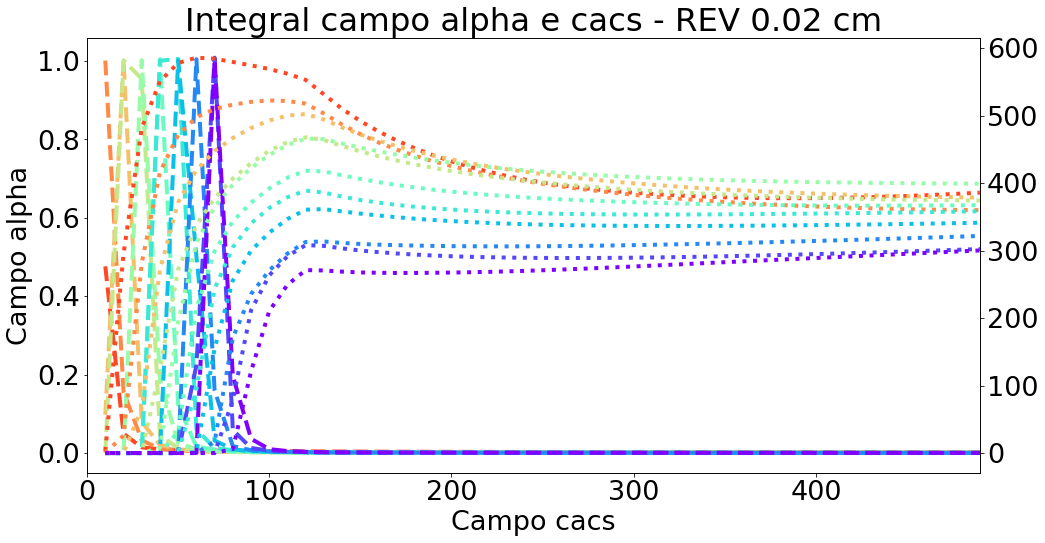

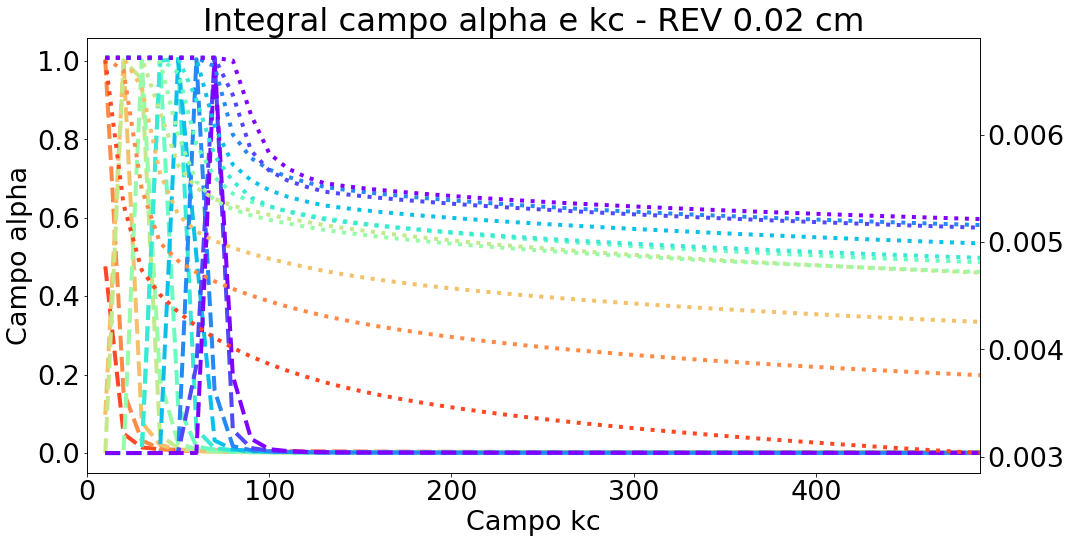

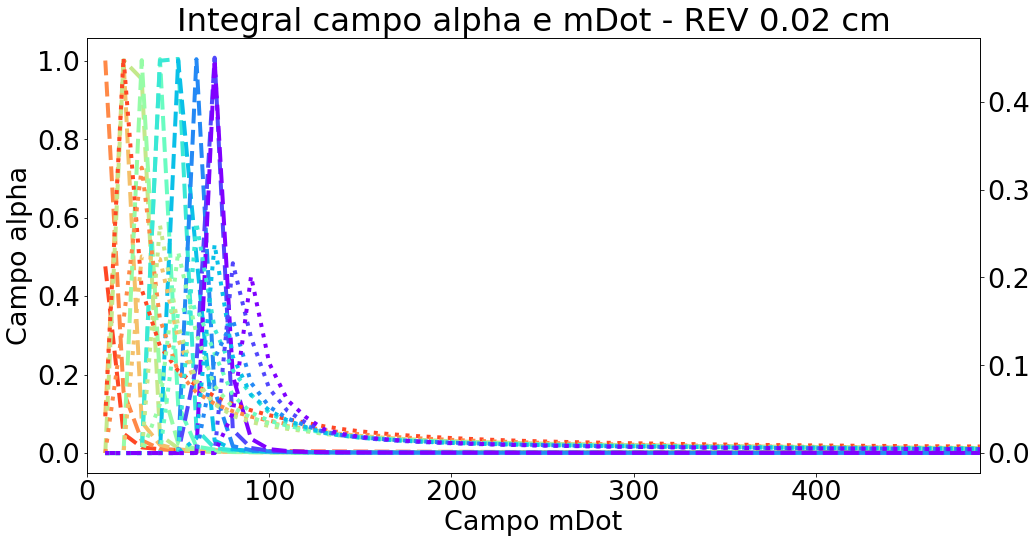

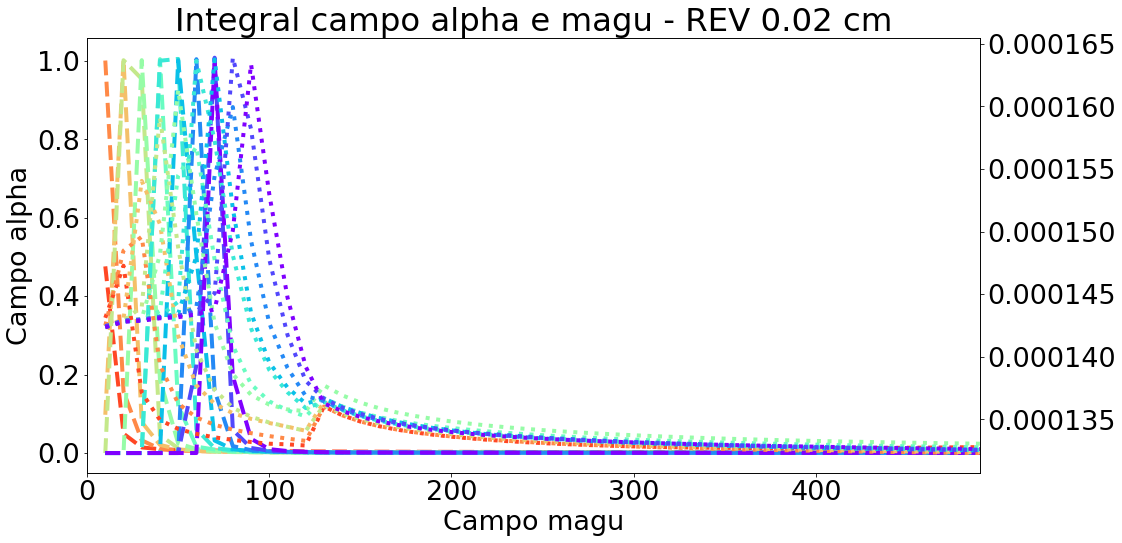

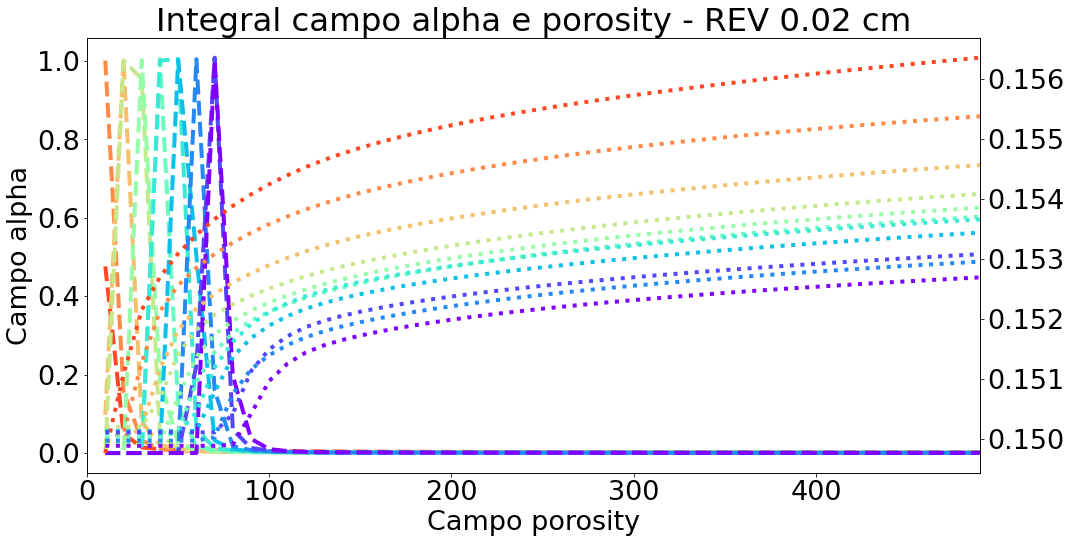

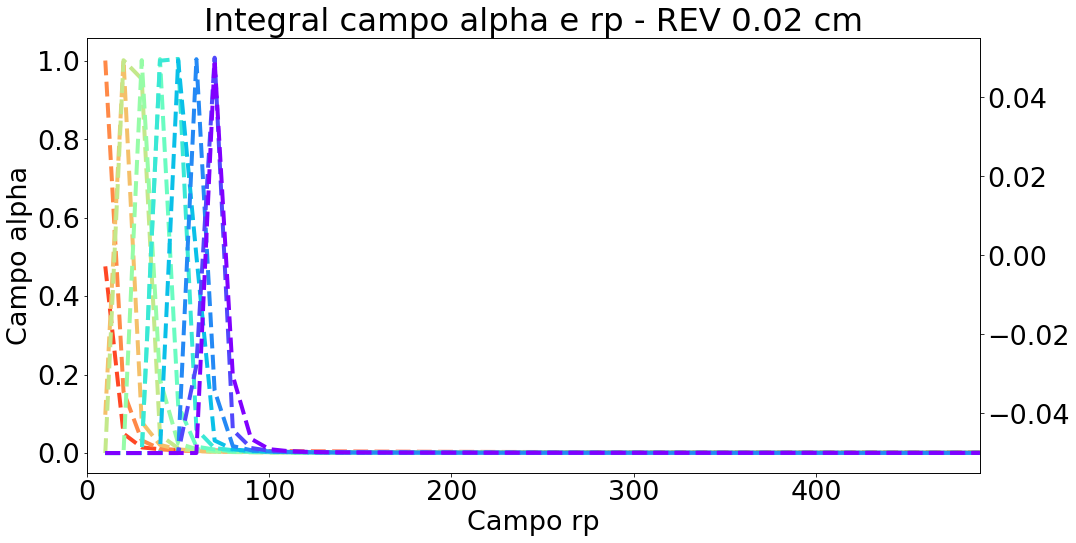

In [44]:
# Ploting graph for Solaine's alpha for each REV WITHOUT uniform start

# Creating color map gradient
col=cm.rainbow(np.linspace(1,0,number_of_revs))

# Create base parameters to create graph for field
fig = plt.figure(figsize=fig_size)
ax1 = fig.add_subplot(1,1,1)
    
# Accessing each field file
revs_result_cacs = rev_results_path + '_' + 'cacs' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
revs_result_av = rev_results_path + '_' + 'av' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
revs_result_kc = rev_results_path + '_' + 'kc' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
revs_result_avkccacs = rev_results_path + '_' + 'avkccacs' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'

# Creating dataframes from CSV
df_fields_cacs = pd.read_csv(revs_result_cacs, float_precision='high')
df_fields_av = pd.read_csv(revs_result_av, float_precision='high')
df_fields_kc = pd.read_csv(revs_result_kc, float_precision='high')
df_fields_avkccacs = pd.read_csv(revs_result_avkccacs, float_precision='high')

# Creating time list of values
#time = df_fields_plot['time'].tolist()

time = df_fields_plot['time']

for field in fields:

    # Create base parameters to create graph for field
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(1,1,1)
    # Creating secondary y-axis    
    ax2=ax1.twinx()
    
    # Accessing each field file
    revs_result_field = rev_results_path + '_' + field + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
    
    # Creating dataframe from CSV
    df_fields_plot = pd.read_csv(revs_result_field, float_precision='high')

    ALPHA={} #empty dictionary

    data = [] #empty list

    ALPHA["time"] = []
    columns = ['time']

    for j in range(1,number_of_revs+1): #for looping 
        ALPHA["rev{}".format(j)] = []
        columns.append("rev{}".format(j))

    df_alpha = pd.DataFrame(data, columns=columns)

    # Iterating for each REV - Plotting non-uniformely graphs
    for j in range(initial_rev, number_of_revs):

        # Reading the field for REV j
        rev_now = 'rev' + str(j+1)

        # Creating arrays    
        rev_field_cacs = np.array( df_fields_cacs[rev_now].tolist() )
        rev_field_av = np.array( df_fields_av[rev_now].tolist() )
        rev_field_kc = np.array( df_fields_kc[rev_now].tolist() )
        rev_field_avkccacs = np.array( df_fields_avkccacs[rev_now].tolist() )

        # Calculating the alpha
        #alpha = (rev_field_avkccacs  * volume_rev ** 2) / (rev_field_av * rev_field_kc * rev_field_cacs + SMALL)
        alpha = (rev_field_avkccacs) / (rev_field_av * rev_field_kc * rev_field_cacs + SMALL)

        # Concatenating the data
        df_alpha = pd.concat([df_alpha, pd.DataFrame(alpha)], axis=0)    

        # Reading the field for REV j
        rev_now = 'rev' + str(j+1)
        rev_field = df_fields_plot[rev_now]
        
        
        # Ploting data
        #ax1.plot(time - start_times[rev_now], alpha, color=col[j], linestyle="--", linewidth=2, markersize=6, marker="", markevery=1, label=r'REV '.format(j))
        ax1.plot(time, alpha, color=col[j], linestyle="--", linewidth=4, markersize=6, marker="", markevery=1, label=r'REV '.format(j))

        # Plotting data in another y-axis
        ax2.plot(time, rev_field, color=col[j], linestyle=":", linewidth=4, markersize=6, marker="", markevery=1, label=r'REV '.format(j))
        
        

    # Export CSV with alphas
    #revs_result_field = rev_results_path + '_' + 'alpha' + '_' + str(rev_thickness).replace('.','',1) + '_revs.csv'
    #df_alpha.to_csv(revs_result_field, float_format='%.6e')

    # Finishing plot and saving graph
    ax1.set_xlabel(r'Campo {}'.format(field))
    ax1.set_ylabel(r'Campo {}'.format('alpha'))   

    # Setting title for secondary y-axis
    ax2.set_xlabel(r'Campo {}'.format(field))
    
    # Searching for max time
    max_time = max( np.array( time ) )
    plt.xlim(0, max_time )
    
    #ax1.axvline(x=725, ymin=0.0, ymax=1, label='Breaktrough', color='black', linestyle='dotted', linewidth=3)
    plt.title('Integral campo {} e {} - REV {} cm'.format('alpha', field,  rev_thickness))
    #ax1.legend()

    #plt.semilogy()
    #plt.semilogx()
    figure_name = rev_results_path + '_graph_' + 'alpha' '+' + field + '_' + str(rev_thickness).replace('.','',1) + '_rev.png'
    plt.savefig(figure_name, dpi=fig.dpi)